In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [12]:
# Load the dataset
df = pd.read_excel(r'F:\CRM_Task_Dataset.xlsx')
df.head()


,Merchant_ID,Merchant_Email,Signup_Date,Last_Email_Opened_Date,Last_Order_Date,Total_Orders,Email_Status,Test_Group
0,4001,merchant1@example.com,2023-01-01,2023-09-11,2023-07-12,0,Opened,Group A - Generic
1,4002,merchant2@example.com,2023-01-02,2023-01-01,2023-01-01,4,Opened,Group B - Personalized
2,4003,merchant3@example.com,2023-01-03,2023-06-15,2023-06-07,44,Opened,Group A - Generic
3,4004,merchant4@example.com,2023-01-04,2023-09-15,2023-10-22,3,Opened,Group B - Personalized
4,4005,merchant5@example.com,2023-01-05,2023-01-01,2023-01-01,15,Spam Reported,Group B - Personalized


In [8]:
# Convert date columns to datetime
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'])
df['Last_Email_Opened_Date'] = pd.to_datetime(df['Last_Email_Opened_Date'])
df['Last_Order_Date'] = pd.to_datetime(df['Last_Order_Date'])


NameError: name 'df' is not defined

In [6]:
# Data Cleaning
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Remove duplicates
df = df.drop_duplicates()


Missing Values:
Merchant_ID               0
Merchant_Email            0
Signup_Date               0
Last_Email_Opened_Date    0
Last_Order_Date           0
Total_Orders              0
Email_Status              0
Test_Group                0
dtype: int64


In [7]:
import pandas as pd

# Assuming df is your DataFrame
std_group_a = df[df['Test_Group'] == 'Group A - Generic']['Total_Orders'].std()
std_group_b = df[df['Test_Group'] == 'Group B - Personalized']['Total_Orders'].std()

print(f"Standard Deviation for Group A: {std_group_a}")
print(f"Standard Deviation for Group B: {std_group_b}")


Standard Deviation for Group A: 13.814380137415887
Standard Deviation for Group B: 14.908636229062882


In [8]:
# Handle outliers (if any)
# For example, cap Total_Orders at a reasonable value
df['Total_Orders'] = df['Total_Orders'].clip(upper=df['Total_Orders'].quantile(0.99))


In [10]:
# Descriptive Insights
print("Descriptive Insights:")
print("Total Merchants:", len(df))
print("Email Status Distribution:")
print(df['Email_Status'].value_counts())
print("Test Group Distribution:")
print(df['Test_Group'].value_counts())


Descriptive Insights:
Total Merchants: 200
Email Status Distribution:
Email_Status
Opened           104
Not Opened        61
Bounced           27
Spam Reported      8
Name: count, dtype: int64
Test Group Distribution:
Test_Group
Group A - Generic         104
Group B - Personalized     96
Name: count, dtype: int64


In [12]:
# Engagement Funnel
signed_up = df['Merchant_ID'].nunique()
opened_email = df[df['Email_Status'] == 'Opened']['Merchant_ID'].nunique()
placed_order = df[df['Total_Orders'] > 0]['Merchant_ID'].nunique()

print("Engagement Funnel:")
print(f"Signed Up: {signed_up}")
print(f"Opened Email: {opened_email} ({(opened_email / signed_up) * 100:.2f}%)")
print(f"Placed Order: {placed_order} ({(placed_order / opened_email) * 100:.2f}%)")

Engagement Funnel:
Signed Up: 200
Opened Email: 104 (52.00%)
Placed Order: 196 (188.46%)


Email Campaign Effectiveness:
Email_Status             Bounced  Not Opened    Opened  Spam Reported
Test_Group                                                           
Group A - Generic       0.144231    0.307692  0.509615       0.038462
Group B - Personalized  0.125000    0.302083  0.531250       0.041667


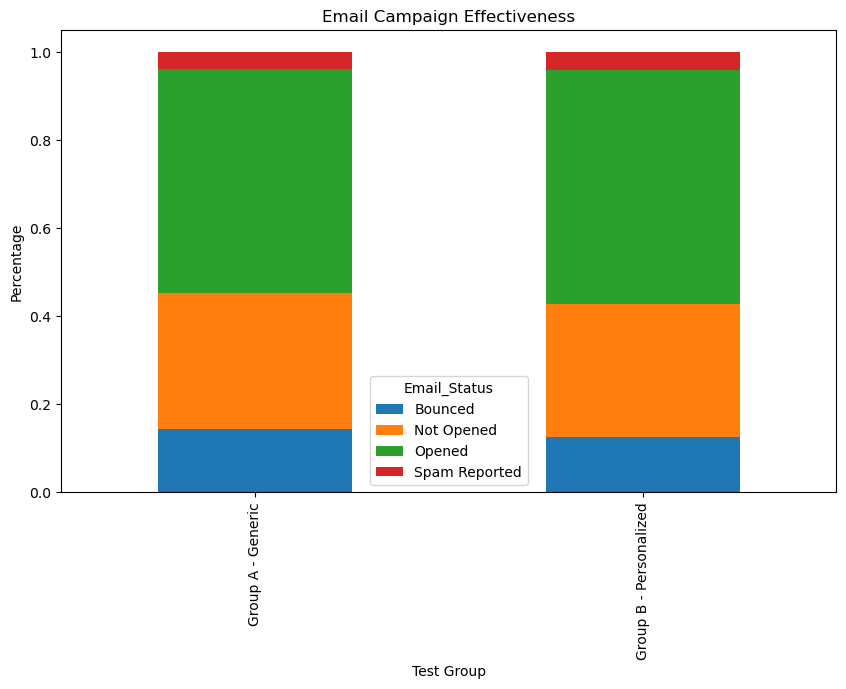

In [19]:
# Compare Group A (Generic) vs. Group B (Personalized)
group_performance = df.groupby('Test_Group')['Email_Status'].value_counts(normalize=True).unstack()
print("Email Campaign Effectiveness:")
print(group_performance)

# Plot Email Campaign Effectiveness
group_performance.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Email Campaign Effectiveness')
plt.xlabel('Test Group')
plt.ylabel('Percentage')
plt.show()

Email Campaign Effectiveness:
Email_Status             Bounced  Not Opened    Opened  Spam Reported
Test_Group                                                           
Group A - Generic       0.144231    0.307692  0.509615       0.038462
Group B - Personalized  0.125000    0.302083  0.531250       0.041667


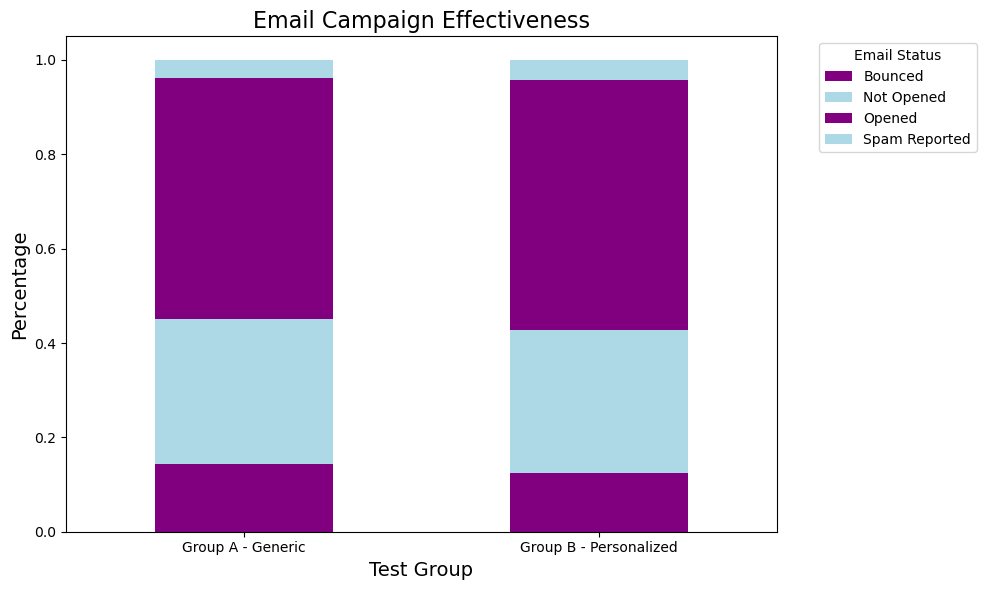

In [20]:
import matplotlib.pyplot as plt

# Compare Group A (Generic) vs. Group B (Personalized)
group_performance = df.groupby('Test_Group')['Email_Status'].value_counts(normalize=True).unstack()
print("Email Campaign Effectiveness:")
print(group_performance)

# Plot Email Campaign Effectiveness
ax = group_performance.plot(kind='bar', stacked=True, figsize=(10, 6), color=['purple', 'lightblue'])
plt.title('Email Campaign Effectiveness', fontsize=16)
plt.xlabel('Test Group', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=0)  # Keep group labels horizontal
plt.legend(title='Email Status', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside

# Save the plot as an image
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig('email_campaign_effectiveness.png', dpi=300, bbox_inches='tight')  # Save as PNG with high quality
plt.show()

In [22]:
# Calculate CLV (Customer Lifetime Value)
# Assumptions:
# - Average Order Value (AOV) = $100 (example value)
# - Purchase Frequency (PF) = Total_Orders / Lifespan (in years)
# - Lifespan = 1 year (for simplicity)
AOV = 100  # Example average order value
df['Lifespan'] = (datetime.now() - df['Signup_Date']).dt.days / 365  # Lifespan in years
df['Purchase_Frequency'] = df['Total_Orders'] / df['Lifespan']
df['CLV'] = AOV * df['Purchase_Frequency'] * df['Lifespan']
# Display CLV for each merchant
print("\nCustomer Lifetime Value (CLV) for Each Merchant:")
print(df[['Merchant_ID', 'CLV']].head())



Customer Lifetime Value (CLV) for Each Merchant:
   Merchant_ID     CLV
0         4001     0.0
1         4002   400.0
2         4003  4400.0
3         4004   300.0
4         4005  1500.0


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Create a DataFrame
df = pd.DataFrame(df)

# Convert date columns to datetime
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'])
df['Last_Order_Date'] = pd.to_datetime(df['Last_Order_Date'])

# Function to calculate months since signup
def months_since_signup(row):
    return (row['Last_Order_Date'].year - row['Signup_Date'].year) * 12 + (row['Last_Order_Date'].month - row['Signup_Date'].month)

# Apply the function to calculate months since signup
df['Months_Since_Signup'] = df.apply(months_since_signup, axis=1)

# Group by Cohort and Months_Since_Signup, then calculate average CLV
cohort_data = df.groupby(['Cohort', 'Months_Since_Signup'])['CLV'].mean().unstack()

# Fill NaN values with 0 (if no data for a specific month)
cohort_data = cohort_data.fillna(0)

# Display the cohort table
print("Cohort Analysis Table (Average CLV):")
print(cohort_data)

# Visualize the cohort analysis as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cohort_data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('Cohort Analysis - Average CLV Over Time')
plt.xlabel('Months Since Signup')
plt.ylabel('Cohort')
plt.show()

KeyError: 'Column not found: CLV'

In [25]:
# Retention and Engagement Analysis
# Calculate the percentage of merchants who opened emails
opened_emails = df[df['Email_Status'] == 'Opened']
opened_rate = len(opened_emails) / len(df) * 100
print(f"\nEmail Open Rate: {opened_rate:.2f}%")



Email Open Rate: 52.00%


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Create a DataFrame
df = pd.DataFrame(df)

# Check column names
print("Column Names in DataFrame:")
print(df.columns)

# Convert date columns to datetime
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'])
df['Last_Order_Date'] = pd.to_datetime(df['Last_Order_Date'])

# Calculate CLV
df['Average_Purchase_Value'] = df['Monetary'] / df['Total_Orders'].replace(0, 1)  # Avoid division by zero
df['Purchase_Frequency'] = df['Total_Orders'] / df['Lifespan']
df['CLV'] = df['Average_Purchase_Value'] * df['Purchase_Frequency'] * df['Lifespan']

# Function to calculate months since signup
def months_since_signup(row):
    return (row['Last_Order_Date'].year - row['Signup_Date'].year) * 12 + (row['Last_Order_Date'].month - row['Signup_Date'].month)

# Apply the function to calculate months since signup
df['Months_Since_Signup'] = df.apply(months_since_signup, axis=1)

# Group by Cohort and Months_Since_Signup, then calculate average CLV
cohort_data = df.groupby(['Cohort', 'Months_Since_Signup'])['CLV'].mean().unstack()

# Fill NaN values with 0 (if no data for a specific month)
cohort_data = cohort_data.fillna(0)

# Display the cohort table
print("Cohort Analysis Table (Average CLV):")
print(cohort_data)

# Visualize the cohort analysis as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cohort_data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('Cohort Analysis - Average CLV Over Time')
plt.xlabel('Months Since Signup')
plt.ylabel('Cohort')
plt.show()

Column Names in DataFrame:
Index(['Merchant_ID', 'Merchant_Email', 'Signup_Date',
       'Last_Email_Opened_Date', 'Last_Order_Date', 'Total_Orders',
       'Email_Status', 'Test_Group', 'Cohort', 'Order_Month',
       'Months_Since_Signup'],
      dtype='object')


KeyError: 'Monetary'

Spam Rates:
Group A (Generic): 3.85%
Group B (Personalized): 4.17%

Bounce Rates:
Group A (Generic): 14.42%
Group B (Personalized): 12.50%


C:\Users\PanDa\AppData\Local\Temp\ipykernel_11784\1805900472.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Group", y="Spam Rate", data=df_vis, palette="Blues")


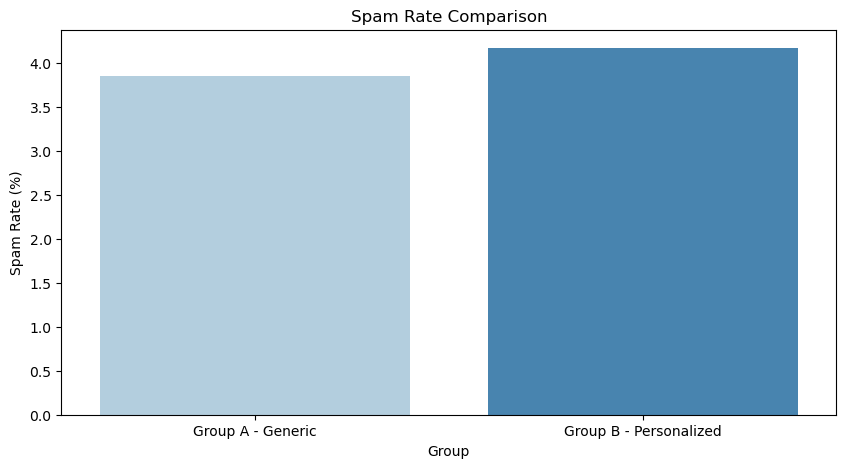

C:\Users\PanDa\AppData\Local\Temp\ipykernel_11784\1805900472.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Group", y="Bounce Rate", data=df_vis, palette="Reds")


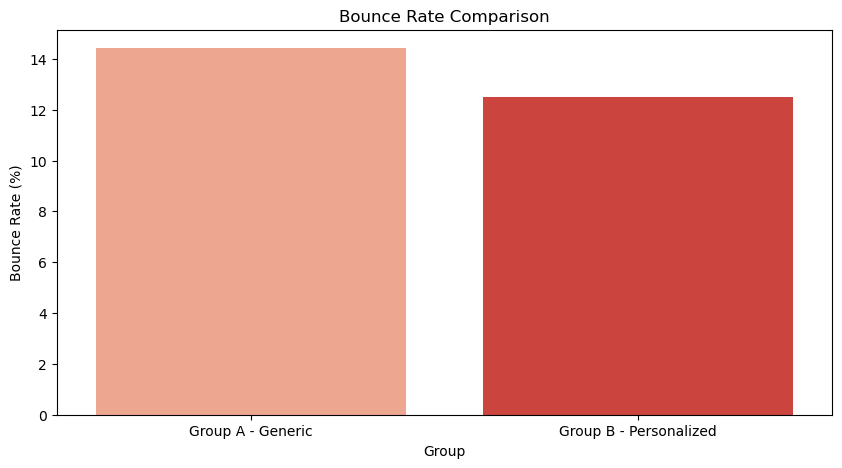

In [35]:


# Extract data for Group A (Generic) and Group B (Personalized)
group_a = df[df["Test_Group"] == "Group A - Generic"]
group_b = df[df["Test_Group"] == "Group B - Personalized"]

# Calculate spam rates
spam_a = group_a[group_a["Email_Status"] == "Spam Reported"].shape[0]  # Spam in Group A
total_a = group_a.shape[0]  # Total emails in Group A
spam_rate_a = (spam_a / total_a) * 100  # Spam rate for Group A

spam_b = group_b[group_b["Email_Status"] == "Spam Reported"].shape[0]  # Spam in Group B
total_b = group_b.shape[0]  # Total emails in Group B
spam_rate_b = (spam_b / total_b) * 100  # Spam rate for Group B

# Calculate bounce rates
bounce_a = group_a[group_a["Email_Status"] == "Bounced"].shape[0]  # Bounced in Group A
bounce_rate_a = (bounce_a / total_a) * 100  # Bounce rate for Group A

bounce_b = group_b[group_b["Email_Status"] == "Bounced"].shape[0]  # Bounced in Group B
bounce_rate_b = (bounce_b / total_b) * 100  # Bounce rate for Group B

# Print the percentages
print("Spam Rates:")
print(f"Group A (Generic): {spam_rate_a:.2f}%")
print(f"Group B (Personalized): {spam_rate_b:.2f}%")

print("\nBounce Rates:")
print(f"Group A (Generic): {bounce_rate_a:.2f}%")
print(f"Group B (Personalized): {bounce_rate_b:.2f}%")

# Visualization
# Create a DataFrame for visualization
data = {
    "Group": ["Group A - Generic", "Group B - Personalized"],
    "Spam Rate": [spam_rate_a, spam_rate_b],
    "Bounce Rate": [bounce_rate_a, bounce_rate_b]
}
df_vis = pd.DataFrame(data)

# Plot spam rates
plt.figure(figsize=(10, 5))
sns.barplot(x="Group", y="Spam Rate", data=df_vis, palette="Blues")
plt.title("Spam Rate Comparison")
plt.ylabel("Spam Rate (%)")
plt.xlabel("Group")
plt.show()

# Plot bounce rates
plt.figure(figsize=(10, 5))
sns.barplot(x="Group", y="Bounce Rate", data=df_vis, palette="Reds")
plt.title("Bounce Rate Comparison")
plt.ylabel("Bounce Rate (%)")
plt.xlabel("Group")
plt.show()

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract data for Group A (Generic) and Group B (Personalized)
# Ensure the column name "Test_Group" exists in the dataset
if "Test_Group" not in df.columns:
    print("\nError: 'Test_Group' column not found in the dataset.")
    exit()

group_a = df[df["Test_Group"] == "Group A - Generic"]
group_b = df[df["Test_Group"] == "Group B - Personalized"]

# Debugging: Print the number of rows in each group
print(f"\nNumber of rows in Group A (Generic): {len(group_a)}")
print(f"Number of rows in Group B (Personalized): {len(group_b)}")

# Calculate spam rates
if "Email_Status" not in df.columns:
    print("\nError: 'Email_Status' column not found in the dataset.")
    exit()

spam_a = group_a[group_a["Email_Status"] == "Spam Reported"].shape[0]  # Spam in Group A
total_a = group_a.shape[0]  # Total emails in Group A
spam_rate_a = (spam_a / total_a) * 100  # Spam rate for Group A

spam_b = group_b[group_b["Email_Status"] == "Spam Reported"].shape[0]  # Spam in Group B
total_b = group_b.shape[0]  # Total emails in Group B
spam_rate_b = (spam_b / total_b) * 100  # Spam rate for Group B

# Calculate bounce rates
bounce_a = group_a[group_a["Email_Status"] == "Bounced"].shape[0]  # Bounced in Group A
bounce_rate_a = (bounce_a / total_a) * 100  # Bounce rate for Group A

bounce_b = group_b[group_b["Email_Status"] == "Bounced"].shape[0]  # Bounced in Group B
bounce_rate_b = (bounce_b / total_b) * 100  # Bounce rate for Group B

# Print the percentages
print("\nSpam Rates:")
print(f"Group A (Generic): {spam_rate_a:.2f}%")
print(f"Group B (Personalized): {spam_rate_b:.2f}%")

print("\nBounce Rates:")
print(f"Group A (Generic): {bounce_rate_a:.2f}%")
print(f"Group B (Personalized): {bounce_rate_b:.2f}%")

# Visualization
# Create a DataFrame for visualization
data = {
    "Group": ["Group A - Generic", "Group B - Personalized"],
    "Spam Rate": [spam_rate_a, spam_rate_b],
    "Bounce Rate": [bounce_rate_a, bounce_rate_b]
}
df_vis = pd.DataFrame(data)

# Plot spam rates
plt.figure(figsize=(10, 5))
sns.barplot(x="Group", y="Spam Rate", data=df_vis, palette="Blues")
plt.title("Spam Rate Comparison")
plt.ylabel("Spam Rate (%)")
plt.xlabel("Group")
plt.show()

# Plot bounce rates
plt.figure(figsize=(10, 5))
sns.barplot(x="Group", y="Bounce Rate", data=df_vis, palette="Reds")
plt.title("Bounce Rate Comparison")
plt.ylabel("Bounce Rate (%)")
plt.xlabel("Group")
plt.show()

AttributeError: 'float' object has no attribute 'columns'

Recent Order Rate (Last 3 Months): 0.00%


In [103]:
# Churn Analysis: Merchants who haven't opened emails or placed orders in the last 6 months
inactive_merchants = df[(df['Last_Email_Opened_Date'] < (datetime.now() - pd.DateOffset(months=6))) |
                        (df['Last_Order_Date'] < (datetime.now() - pd.DateOffset(months=6)))]
churn_rate = len(inactive_merchants) / len(df) * 100
print(f"Churn Rate (Inactive for 6 Months): {churn_rate:.2f}%")


Churn Rate (Inactive for 6 Months): 100.00%


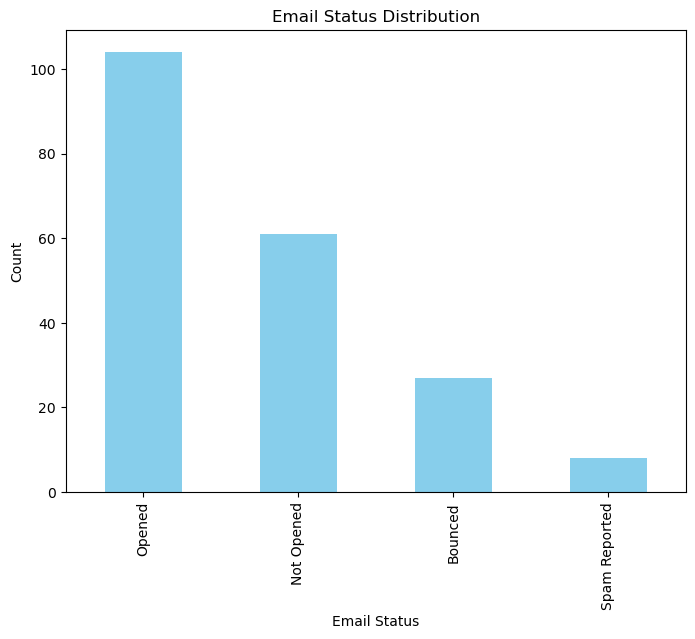

In [105]:
# Visualization: Email Status Distribution
plt.figure(figsize=(8, 6))
df['Email_Status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Email Status Distribution')
plt.xlabel('Email Status')
plt.ylabel('Count')
plt.show()

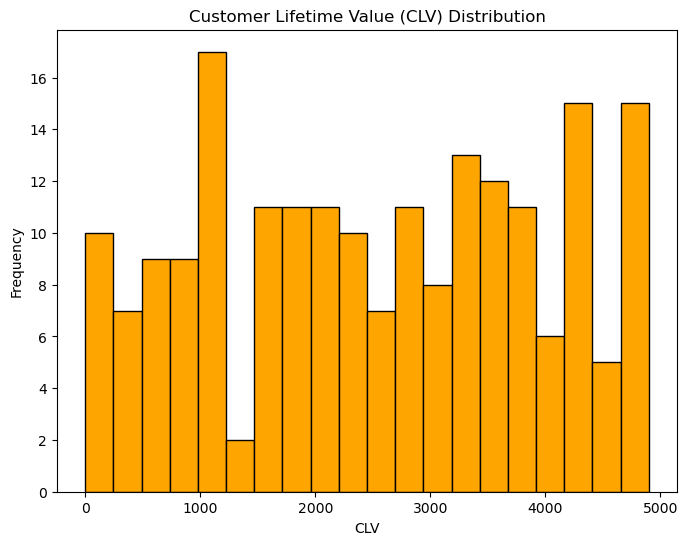

In [107]:
# Visualization: CLV Distribution
plt.figure(figsize=(8, 6))
plt.hist(df['CLV'], bins=20, color='orange', edgecolor='black')
plt.title('Customer Lifetime Value (CLV) Distribution')
plt.xlabel('CLV')
plt.ylabel('Frequency')
plt.show()


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Create a DataFrame
df = pd.DataFrame(df)

# Convert date columns to datetime
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'])
df['Last_Order_Date'] = pd.to_datetime(df['Last_Order_Date'])

# Function to calculate months since signup
def months_since_signup(row):
    return (row['Last_Order_Date'].year - row['Signup_Date'].year) * 12 + (row['Last_Order_Date'].month - row['Signup_Date'].month)

# Apply the function to calculate months since signup
df['Months_Since_Signup'] = df.apply(months_since_signup, axis=1)

# Group by Cohort and Months_Since_Signup, then calculate average CLV
cohort_data = df.groupby(['Cohort', 'Months_Since_Signup'])['CLV'].mean().unstack()

# Fill NaN values with 0 (if no data for a specific month)
cohort_data = cohort_data.fillna(0)

# Display the cohort table
print("Cohort Analysis Table (Average CLV):")
print(cohort_data)

# Visualize the cohort analysis as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cohort_data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('Cohort Analysis - Average CLV Over Time')
plt.xlabel('Months Since Signup')
plt.ylabel('Cohort')
plt.show()

KeyError: 'Column not found: CLV'

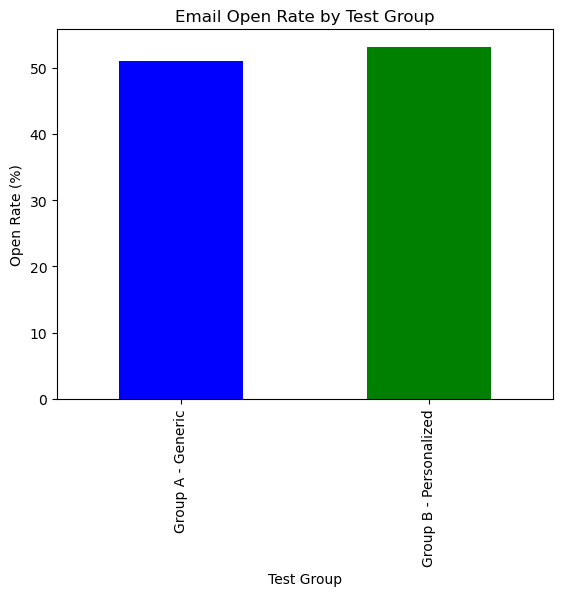

In [109]:
# Visualization: Test Group Performance (Email Open Rate)
group_performance = df.groupby('Test_Group')['Email_Status'].apply(lambda x: (x == 'Opened').mean() * 100)
group_performance.plot(kind='bar', color=['blue', 'green'])
plt.title('Email Open Rate by Test Group')
plt.xlabel('Test Group')
plt.ylabel('Open Rate (%)')
plt.show()


In [111]:
# Recommendations
print("\nRecommendations:")
print("1. Enhance Personalization: Focus on personalized email campaigns for Group A to improve engagement.")
print("2. Re-engagement Campaigns: Target inactive merchants with special offers or personalized messages.")
print("3. Monitor Email Deliverability: Reduce bounce rates by maintaining a clean email list.")
print("4. Segment Merchants: Tailor campaigns based on activity levels (e.g., high-activity vs. low-activity merchants).")
print("5. Leverage Data Analytics: Use predictive models to forecast CLV and churn rates.")



Recommendations:
1. Enhance Personalization: Focus on personalized email campaigns for Group A to improve engagement.
2. Re-engagement Campaigns: Target inactive merchants with special offers or personalized messages.
3. Monitor Email Deliverability: Reduce bounce rates by maintaining a clean email list.
4. Segment Merchants: Tailor campaigns based on activity levels (e.g., high-activity vs. low-activity merchants).
5. Leverage Data Analytics: Use predictive models to forecast CLV and churn rates.


In [113]:
# Add a monetary column (assuming average order value = $100)
df['Monetary'] = df['Total_Orders'] * 100

# RFM Analysis
# Recency: Days since last order
df['Recency'] = (datetime.now() - df['Last_Order_Date']).dt.days

# Frequency: Total orders
df['Frequency'] = df['Total_Orders']

# Monetary: Total monetary value
df['Monetary'] = df['Total_Orders'] * 100

# RFM Score Calculation
df['R_Score'] = pd.qcut(df['Recency'], q=4, labels=[4, 3, 2, 1])  # Lower recency is better
df['F_Score'] = pd.qcut(df['Frequency'], q=4, labels=[1, 2, 3, 4])  # Higher frequency is better
df['M_Score'] = pd.qcut(df['Monetary'], q=4, labels=[1, 2, 3, 4])  # Higher monetary is better

# Combine RFM scores
df['RFM_Score'] = df['R_Score'].astype(int) + df['F_Score'].astype(int) + df['M_Score'].astype(int)

# RFM Segmentation
def rfm_segment(score):
    if score >= 10:
        return 'High-Value'
    elif score >= 7:
        return 'Mid-Value'
    else:
        return 'Low-Value'

df['RFM_Segment'] = df['RFM_Score'].apply(rfm_segment)
# Display RFM Segmentation
print("RFM Segmentation:")
print(df['RFM_Segment'].value_counts())


RFM Segmentation:
RFM_Segment
Low-Value     81
Mid-Value     69
High-Value    50
Name: count, dtype: int64


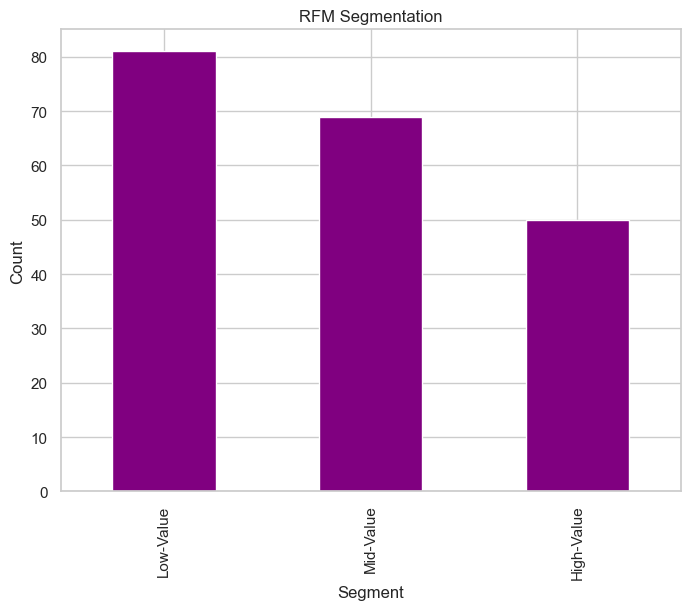

In [107]:
# Visualization: RFM Segmentation
plt.figure(figsize=(8, 6))
df['RFM_Segment'].value_counts().plot(kind='bar', color='purple')
plt.title('RFM Segmentation')
plt.xlabel('Segment')
plt.ylabel('Count')
# Save the plot as a PNG file
plt.savefig("customer_segmentation.png", dpi=300, bbox_inches="tight")

plt.show()



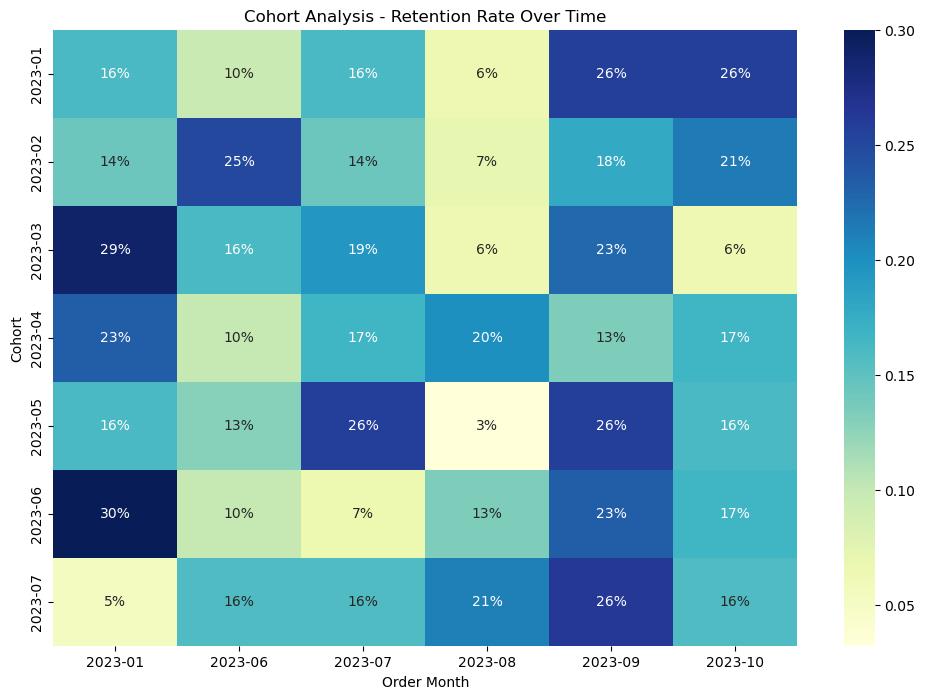

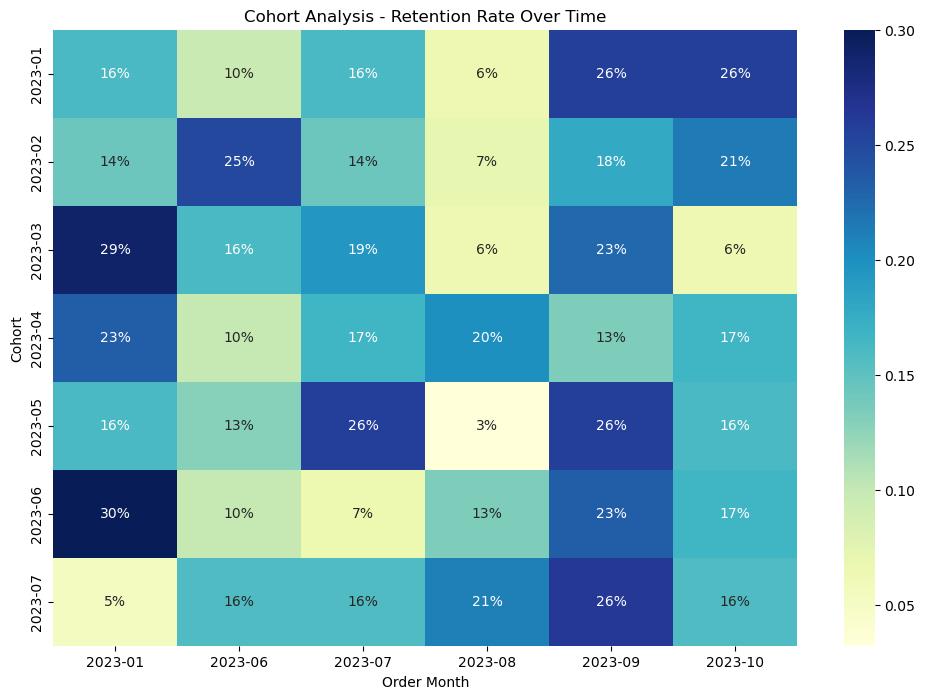

In [16]:
# Cohort Analysis
# Create cohorts based on signup month
df['Cohort'] = df['Signup_Date'].dt.to_period('M')

# Calculate cohort size
cohort_size = df.groupby('Cohort')['Merchant_ID'].nunique().reset_index()
cohort_size.columns = ['Cohort', 'Total_Merchants']

# Calculate retention rate
df['Order_Month'] = df['Last_Order_Date'].dt.to_period('M')
cohort_data = df.groupby(['Cohort', 'Order_Month'])['Merchant_ID'].nunique().reset_index()
cohort_data = cohort_data.merge(cohort_size, on='Cohort')
cohort_data['Retention_Rate'] = cohort_data['Merchant_ID'] / cohort_data['Total_Merchants']

# Pivot table for retention rate heatmap
cohort_pivot = cohort_data.pivot_table(index='Cohort', columns='Order_Month', values='Retention_Rate')
# Visualization: Cohort Retention Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Cohort Analysis - Retention Rate Over Time')
plt.xlabel('Order Month')
plt.ylabel('Cohort')
plt.show()


# Cohort Analysis Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Cohort Analysis - Retention Rate Over Time')
plt.xlabel('Order Month')
plt.ylabel('Cohort')

# Option 1: Display the plot (use this in interactive environments like Jupyter Notebook)
plt.show()

# Option 2: Save the plot to a file (use this in non-interactive environments)
plt.savefig('cohort_retention_heatmap.png')
plt.close()  # Close the plot to free up memory

Cohort Pivot Table:
Order_Month   2023-01   2023-06   2023-07   2023-08   2023-09   2023-10
Cohort                                                                 
2023-01      0.161290  0.096774  0.161290  0.064516  0.258065  0.258065
2023-02      0.142857  0.250000  0.142857  0.071429  0.178571  0.214286
2023-03      0.290323  0.161290  0.193548  0.064516  0.225806  0.064516
2023-04      0.233333  0.100000  0.166667  0.200000  0.133333  0.166667
2023-05      0.161290  0.129032  0.258065  0.032258  0.258065  0.161290
2023-06      0.300000  0.100000  0.066667  0.133333  0.233333  0.166667
2023-07      0.052632  0.157895  0.157895  0.210526  0.263158  0.157895
Cohort retention analysis exported to 'cohort_retention_analysis.xlsx'


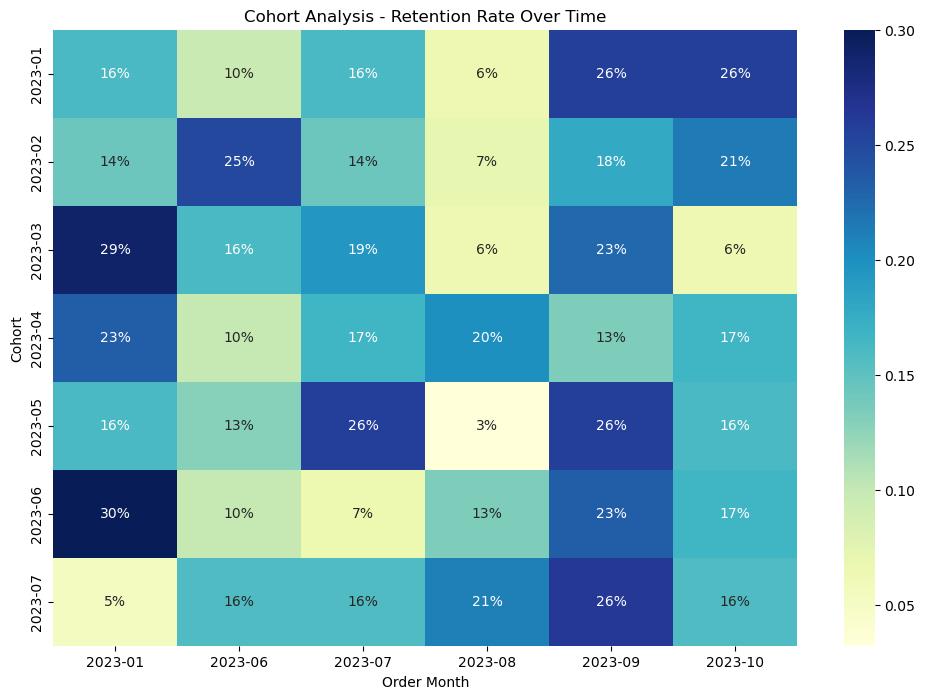

In [18]:
# Cohort Analysis
# Create cohorts based on signup month
df['Cohort'] = df['Signup_Date'].dt.to_period('M')

# Calculate cohort size
cohort_size = df.groupby('Cohort')['Merchant_ID'].nunique().reset_index()
cohort_size.columns = ['Cohort', 'Total_Merchants']

# Calculate retention rate
df['Order_Month'] = df['Last_Order_Date'].dt.to_period('M')
cohort_data = df.groupby(['Cohort', 'Order_Month'])['Merchant_ID'].nunique().reset_index()
cohort_data = cohort_data.merge(cohort_size, on='Cohort')
cohort_data['Retention_Rate'] = cohort_data['Merchant_ID'] / cohort_data['Total_Merchants']

# Pivot table for retention rate heatmap
cohort_pivot = cohort_data.pivot_table(index='Cohort', columns='Order_Month', values='Retention_Rate')

# Debugging: Print cohort_pivot to verify its contents
print("Cohort Pivot Table:")
print(cohort_pivot)

# Handle missing values (if any)
cohort_pivot = cohort_pivot.fillna(0)  # Fill NaN values with 0
# Export to Excel
cohort_pivot.to_excel('cohort_retention_analysis.xlsx', float_format='%.2f')

print("Cohort retention analysis exported to 'cohort_retention_analysis.xlsx'")


# Visualization: Cohort Retention Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Cohort Analysis - Retention Rate Over Time')
plt.xlabel('Order Month')
plt.ylabel('Cohort')

# Option 1: Display the plot (use this in interactive environments like Jupyter Notebook)
plt.show()

# Option 2: Save the plot to a file (use this in non-interactive environments)
plt.savefig('cohort_retention_heatmap.png')
plt.close()  # Close the plot to free up memory


Churn Prediction Model Evaluation:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        60

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Confusion Matrix:
[[60]]

Feature Importance for Churn Prediction:
Total_Orders    0.0
Recency         0.0
Frequency       0.0
Monetary        0.0
RFM_Score       0.0
dtype: float64


C:\Users\PanDa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


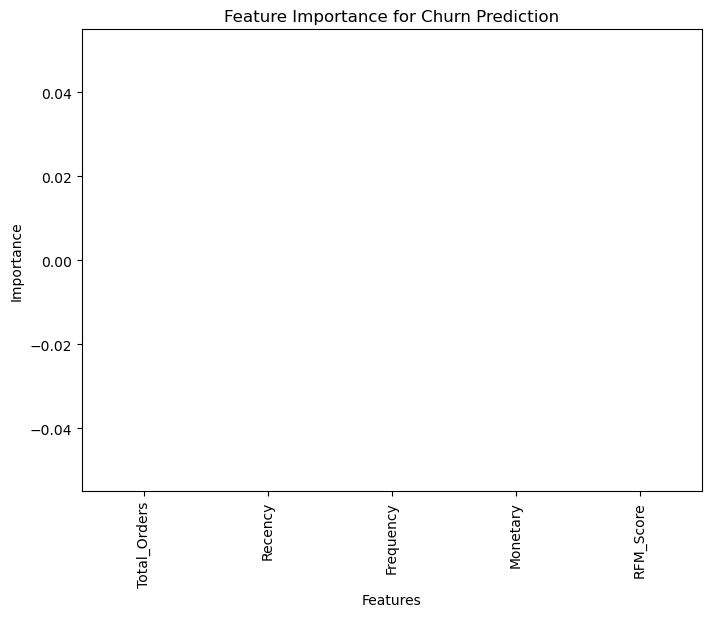

In [121]:
# Churn Prediction
# Define churn: Merchants who haven't placed an order in the last 3 months
df['Churn'] = (df['Last_Order_Date'] < (datetime.now() - pd.DateOffset(months=3))).astype(int)

# Features for churn prediction
features = ['Total_Orders', 'Recency', 'Frequency', 'Monetary', 'RFM_Score']
X = df[features]
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nChurn Prediction Model Evaluation:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print("\nFeature Importance for Churn Prediction:")
print(feature_importance)

# Visualization: Feature Importance
plt.figure(figsize=(8, 6))
feature_importance.plot(kind='bar', color='teal')
plt.title('Feature Importance for Churn Prediction')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()



In [123]:

# Convert date columns to datetime
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'])
df['Last_Email_Opened_Date'] = pd.to_datetime(df['Last_Email_Opened_Date'])
df['Last_Order_Date'] = pd.to_datetime(df['Last_Order_Date'])

# Define dormant merchants
# Criteria: No order in the last 6 months AND no email opened in the last 6 months
dormant_merchants = df[
    (df['Last_Order_Date'] < (datetime.now() - pd.DateOffset(months=6))) &
    (df['Last_Email_Opened_Date'] < (datetime.now() - pd.DateOffset(months=6)))
]

# Number of dormant merchants
print(f"Number of Dormant Merchants: {len(dormant_merchants)}")

# Display dormant merchants
print("\nDormant Merchants:")
print(dormant_merchants[['Merchant_ID', 'Last_Order_Date', 'Last_Email_Opened_Date', 'Total_Orders']].head())

Number of Dormant Merchants: 200

Dormant Merchants:
   Merchant_ID Last_Order_Date Last_Email_Opened_Date  Total_Orders
0         4001      2023-07-12             2023-09-11             0
1         4002      2023-01-01             2023-01-01             4
2         4003      2023-06-07             2023-06-15            44
3         4004      2023-10-22             2023-09-15             3
4         4005      2023-01-01             2023-01-01            15


In [125]:
# Analyze order history of dormant merchants
dormant_order_stats = dormant_merchants['Total_Orders'].describe()
print("\nOrder History of Dormant Merchants:")
print(dormant_order_stats)

# Analyze email engagement of dormant merchants
dormant_email_stats = dormant_merchants['Email_Status'].value_counts()
print("\nEmail Engagement of Dormant Merchants:")
print(dormant_email_stats)

# Analyze signup cohorts of dormant merchants
dormant_cohorts = dormant_merchants['Signup_Date'].dt.to_period('M').value_counts().sort_index()
print("\nSignup Cohorts of Dormant Merchants:")
print(dormant_cohorts)


Order History of Dormant Merchants:
count    200.000000
mean      25.340000
std       14.326221
min        0.000000
25%       12.000000
50%       25.000000
75%       37.000000
max       49.000000
Name: Total_Orders, dtype: float64

Email Engagement of Dormant Merchants:
Email_Status
Opened           104
Not Opened        61
Bounced           27
Spam Reported      8
Name: count, dtype: int64

Signup Cohorts of Dormant Merchants:
Signup_Date
2023-01    31
2023-02    28
2023-03    31
2023-04    30
2023-05    31
2023-06    30
2023-07    19
Freq: M, Name: count, dtype: int64


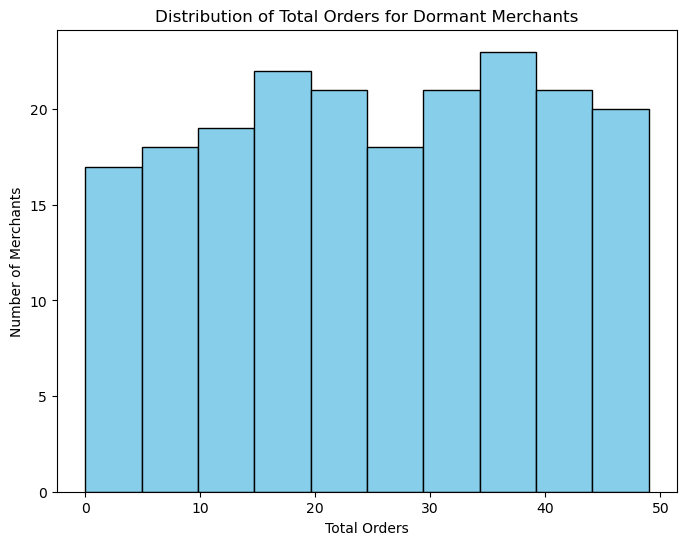

In [127]:
import matplotlib.pyplot as plt

# Plot histogram of Total_Orders for dormant merchants
plt.figure(figsize=(8, 6))
plt.hist(dormant_merchants['Total_Orders'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Orders for Dormant Merchants')
plt.xlabel('Total Orders')
plt.ylabel('Number of Merchants')
plt.show()

In [105]:
# Define activity: Either placed an order or opened an email
df['Last_Activity_Date'] = df[['Last_Order_Date', 'Last_Email_Opened_Date']].max(axis=1)

# Calculate DAU (Daily Active Users)
# For simplicity, let's calculate DAU for the most recent day in the dataset
most_recent_day = df['Last_Activity_Date'].max()
dau = df[df['Last_Activity_Date'] == most_recent_day]['Merchant_ID'].nunique()
print(f"DAU (Daily Active Users) on {most_recent_day.date()}: {dau}")

# Calculate MAU (Monthly Active Users)
# For simplicity, let's calculate MAU for the most recent month in the dataset
most_recent_month = df['Last_Activity_Date'].max().to_period('M')
mau = df[df['Last_Activity_Date'].dt.to_period('M') == most_recent_month]['Merchant_ID'].nunique()
print(f"MAU (Monthly Active Users) for {most_recent_month}: {mau}")

# DAU/MAU Ratio (Engagement Rate)
dau_mau_ratio = dau / mau
print(f"DAU/MAU Ratio (Engagement Rate): {dau_mau_ratio:.2%}")


DAU (Daily Active Users) on 2023-10-28: 1
MAU (Monthly Active Users) for 2023-10: 64
DAU/MAU Ratio (Engagement Rate): 1.56%


In [107]:
# Calculate DAU for each day
daily_activity = df.groupby(df['Last_Activity_Date'].dt.date)['Merchant_ID'].nunique()
print("\nDAU Over Time:")
print(daily_activity.tail())  # Show the most recent days

# Calculate MAU for each month
monthly_activity = df.groupby(df['Last_Activity_Date'].dt.to_period('M'))['Merchant_ID'].nunique()
print("\nMAU Over Time:")
print(monthly_activity.tail())  # Show the most recent months



DAU Over Time:
Last_Activity_Date
2023-10-23    3
2023-10-24    2
2023-10-25    6
2023-10-26    4
2023-10-28    1
Name: Merchant_ID, dtype: int64

MAU Over Time:
Last_Activity_Date
2023-06    18
2023-07    30
2023-08    28
2023-09    53
2023-10    64
Freq: M, Name: Merchant_ID, dtype: int64


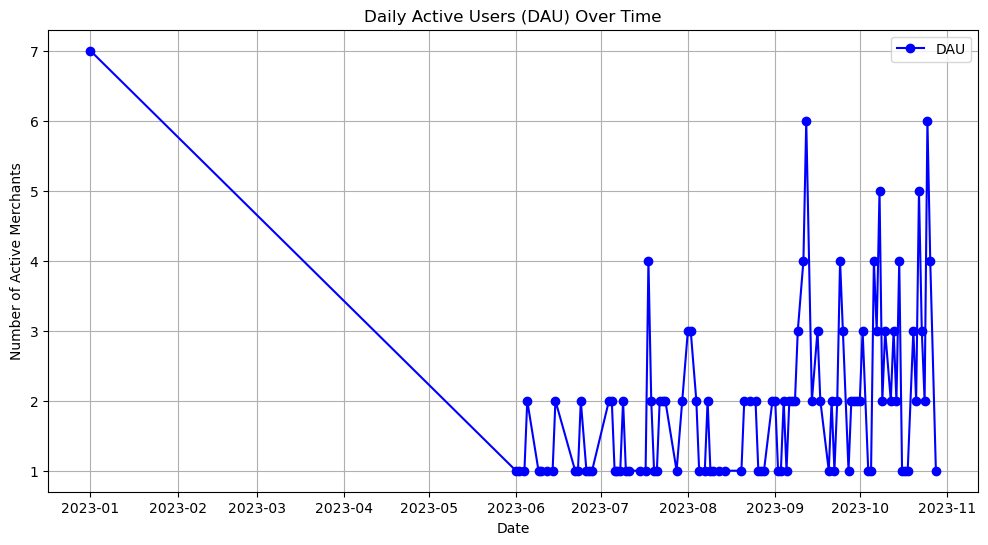

In [109]:
# Plot DAU Over Time
plt.figure(figsize=(12, 6))
plt.plot(daily_activity.index, daily_activity.values, marker='o', color='blue', label='DAU')
plt.title('Daily Active Users (DAU) Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Active Merchants')
plt.grid(True)
plt.legend()
plt.show()# Create a complete date range for all months in the dataset
min_month = activity_dates_df["Month"].min()
max_month = activity_dates_df["Month"].max()
complete_months = pd.period_range(start=min_month, end=max_month, freq="M")
# Create a complete date range for all months in the dataset
min_month = activity_dates_df["Month"].min()
max_month = activity_dates_df["Month"].max()
complete_months = pd.period_range(start=min_month, end=max_month, freq="M")


TypeError: float() argument must be a string or a real number, not 'Period'

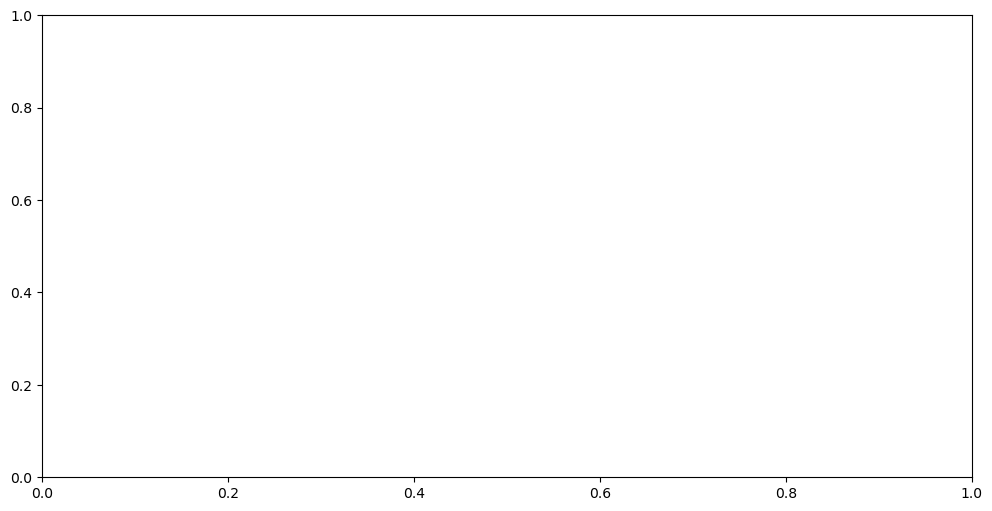

In [81]:
# Plot MAU Over Time
plt.figure(figsize=(12, 6))
plt.plot(monthly_activity.index, monthly_activity.values, marker='o', color='green', label='MAU')
plt.title('Monthly Active Users (MAU) Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Active Merchants')
plt.grid(True)
plt.legend()
plt.show()

In [111]:
# Calculate Monthly Active Users (MAU)
mau = activity_dates_df.groupby("Month")["Date"].nunique().reset_index(name="MAU")

# Create a complete date range for all months in the dataset
min_month = activity_dates_df["Month"].min()
max_month = activity_dates_df["Month"].max()
complete_months = pd.period_range(start=min_month, end=max_month, freq="M")



Overall Stickiness Ratio: 100.00%


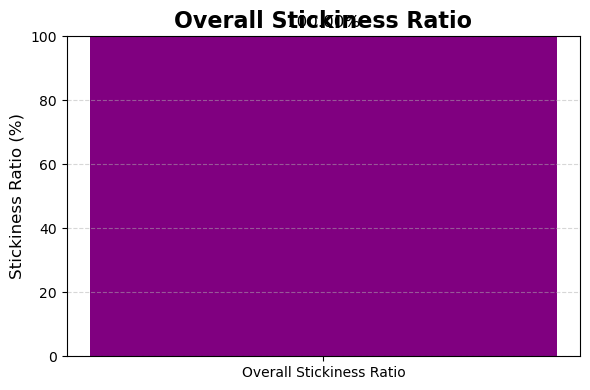

In [139]:

# Extract day and month from activity dates
activity_dates = pd.to_datetime(activity_dates)
activity_dates_df = pd.DataFrame({
    "Date": activity_dates,
    "Day": activity_dates.dt.date,
    "Month": activity_dates.dt.to_period("M")
})
# Calculate Daily Active Users (DAU)
dau = activity_dates_df.groupby("Day")["Date"].nunique().reset_index(name="DAU")

# Calculate Monthly Active Users (MAU)
mau = activity_dates_df.groupby("Month")["Date"].nunique().reset_index(name="MAU")

# Calculate average DAU for each month
activity_dates_df["Month"] = activity_dates_df["Date"].dt.to_period("M")
avg_dau = activity_dates_df.groupby("Month")["Date"].nunique().reset_index(name="Avg_DAU")

# Merge MAU and average DAU
stickiness_data = mau.merge(avg_dau, on="Month", how="left")

# Calculate Stickiness Ratio for each month
stickiness_data["Stickiness Ratio"] = (stickiness_data["Avg_DAU"] / stickiness_data["MAU"]) * 100

# Calculate Overall Stickiness Ratio
overall_stickiness_ratio = stickiness_data["Stickiness Ratio"].mean()

# Print Overall Stickiness Ratio
print(f"\nOverall Stickiness Ratio: {overall_stickiness_ratio:.2f}%")

# Visualization
# Bar plot for Overall Stickiness Ratio
plt.figure(figsize=(6, 4))
plt.bar(["Overall Stickiness Ratio"], [overall_stickiness_ratio], color="purple", width=0.5)
plt.title("Overall Stickiness Ratio", fontsize=16, fontweight="bold")
plt.ylabel("Stickiness Ratio (%)", fontsize=12)
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add value label on top of the bar
plt.text(0, overall_stickiness_ratio + 2, f"{overall_stickiness_ratio:.2f}%", 
         ha="center", va="bottom", fontsize=12, color="black")

plt.tight_layout()
plt.show()

In [151]:
dau_check = activity_dates_df.groupby(["Month", "Day"])["Merchant_ID"].nunique().reset_index(name="DAU")
mau_check = activity_dates_df.groupby("Month")["Merchant_ID"].nunique().reset_index(name="MAU")
print(dau_check.head())
print(mau_check.head())


     Month         Day  DAU
0  2023-01  2023-01-01   74
1  2023-01  2023-01-02    1
2  2023-01  2023-01-03    1
3  2023-01  2023-01-04    1
4  2023-01  2023-01-05    1
     Month  MAU
0  2023-01   94
1  2023-02   28
2  2023-03   31
3  2023-04   30
4  2023-05   31



Stickiness Ratio:
     Month  Stickiness Ratio
0  2023-01             100.0
1  2023-02             100.0
2  2023-03             100.0
3  2023-04             100.0
4  2023-05             100.0
5  2023-06             100.0
6  2023-07             100.0
7  2023-08             100.0
8  2023-09             100.0
9  2023-10             100.0

Overall Stickiness Ratio: 100.00%


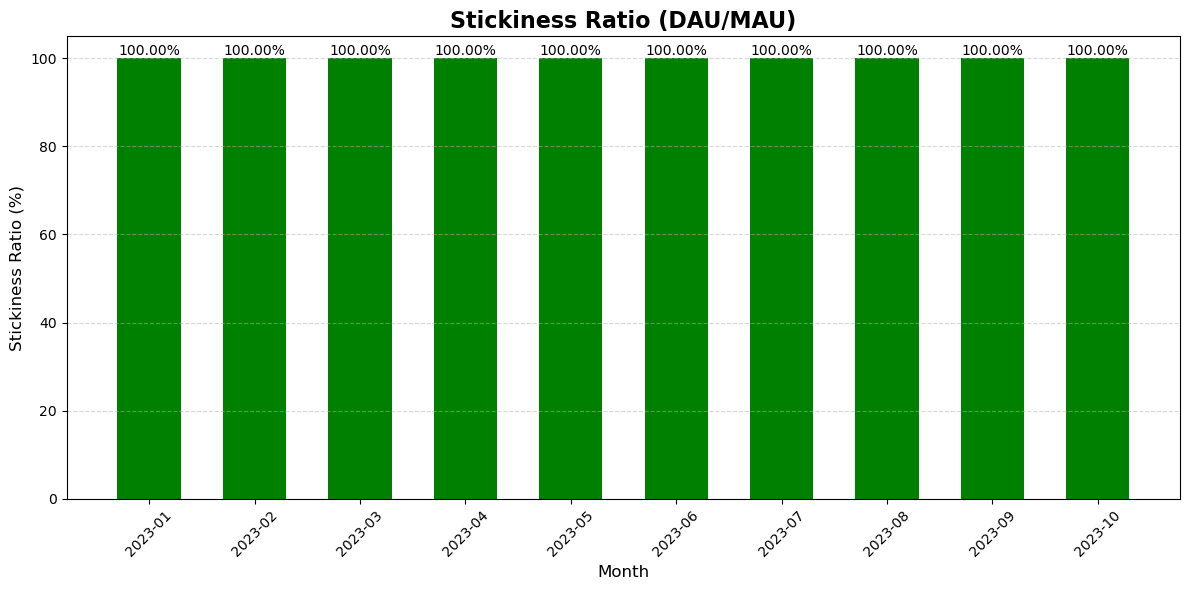

In [161]:
# Convert date columns to datetime
df["Signup_Date"] = pd.to_datetime(df["Signup_Date"])
df["Last_Email_Opened_Date"] = pd.to_datetime(df["Last_Email_Opened_Date"])
df["Last_Order_Date"] = pd.to_datetime(df["Last_Order_Date"])

# Combine all activity dates into a single column
activity_dates = pd.concat([df["Signup_Date"], df["Last_Email_Opened_Date"], df["Last_Order_Date"]])

# Drop rows with NaT (missing dates)
activity_dates = activity_dates.dropna()

# Extract day and month from activity dates
activity_dates_df = pd.DataFrame({
    "Date": activity_dates,
    "Day": activity_dates.dt.date,
    "Month": activity_dates.dt.to_period("M"),
    "Merchant_ID": df.loc[activity_dates.index, "Merchant_ID"]  # Include Merchant_ID for unique user counting
})

# Calculate Daily Active Users (DAU)
dau = activity_dates_df.groupby(["Day", "Month"])["Merchant_ID"].nunique().reset_index(name="DAU")

# Calculate Monthly Active Users (MAU)
mau = activity_dates_df.groupby("Month")["Merchant_ID"].nunique().reset_index(name="MAU")

# Merge MAU and DAU by month to calculate Stickiness Ratio (DAU/MAU)
stickiness_data = mau.merge(dau.groupby("Month")["DAU"].sum().reset_index(), on="Month", how="left")

# Ensure DAU is capped by MAU (i.e., DAU should never exceed MAU for a month)
stickiness_data["DAU"] = stickiness_data[["DAU", "MAU"]].min(axis=1)

# Calculate Stickiness Ratio for each month
stickiness_data["Stickiness Ratio"] = (stickiness_data["DAU"] / stickiness_data["MAU"]) * 100

# Convert 'Month' to string for better plotting
stickiness_data["Month"] = stickiness_data["Month"].astype(str)

# Print Stickiness Ratio
print("\nStickiness Ratio:")
print(stickiness_data[["Month", "Stickiness Ratio"]])

# Calculate Overall Stickiness Ratio
overall_stickiness_ratio = stickiness_data["Stickiness Ratio"].mean()

# Print Overall Stickiness Ratio
print(f"\nOverall Stickiness Ratio: {overall_stickiness_ratio:.2f}%")

# Visualization
# Bar plot for Stickiness Ratio
plt.figure(figsize=(12, 6))
bars = plt.bar(stickiness_data["Month"], stickiness_data["Stickiness Ratio"], color="green", width=0.6)
plt.title("Stickiness Ratio (DAU/MAU)", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Stickiness Ratio (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}%", 
             ha="center", va="bottom", fontsize=10, color="black")

plt.tight_layout()
plt.show()


In [143]:
# Find the month with the highest Stickiness Ratio
best_month = stickiness_data.loc[stickiness_data["Stickiness Ratio"].idxmax()]

# Print the best month and its stickiness ratio
print(f"\nBest Month based on Stickiness Ratio: {best_month['Month']}")
print(f"Stickiness Ratio for {best_month['Month']}: {best_month['Stickiness Ratio']:.2f}%")



Best Month based on Stickiness Ratio: 2023-01
Stickiness Ratio for 2023-01: 100.00%



Overall Stickiness Ratio: 100.00%


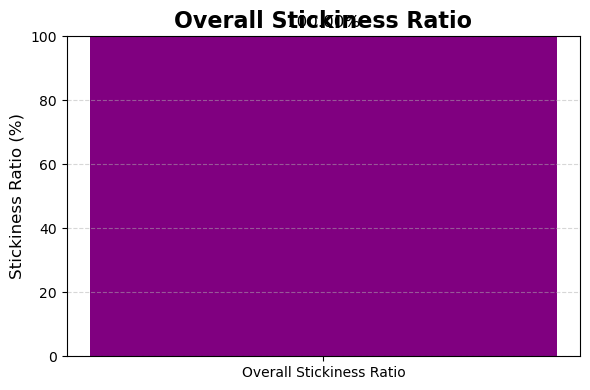

In [137]:


# Convert date columns to datetime
df["Signup_Date"] = pd.to_datetime(df["Signup_Date"])
df["Last_Email_Opened_Date"] = pd.to_datetime(df["Last_Email_Opened_Date"])
df["Last_Order_Date"] = pd.to_datetime(df["Last_Order_Date"])

# Combine all activity dates into a single column
activity_dates = pd.concat([df["Signup_Date"], df["Last_Email_Opened_Date"], df["Last_Order_Date"]])

# Drop rows with NaT (missing dates)
activity_dates = activity_dates.dropna()

# Extract day and month from activity dates
activity_dates = pd.to_datetime(activity_dates)
activity_dates_df = pd.DataFrame({
    "Date": activity_dates,
    "Day": activity_dates.dt.date,
    "Month": activity_dates.dt.to_period("M")
})

# Calculate Daily Active Users (DAU)
dau = activity_dates_df.groupby("Day")["Date"].nunique().reset_index(name="DAU")

# Calculate Monthly Active Users (MAU)
mau = activity_dates_df.groupby("Month")["Date"].nunique().reset_index(name="MAU")

# Calculate average DAU for each month
activity_dates_df["Month"] = activity_dates_df["Date"].dt.to_period("M")
avg_dau = activity_dates_df.groupby("Month")["Date"].nunique().reset_index(name="Avg_DAU")

# Merge MAU and average DAU
stickiness_data = mau.merge(avg_dau, on="Month", how="left")

# Calculate Stickiness Ratio for each month
stickiness_data["Stickiness Ratio"] = (stickiness_data["Avg_DAU"] / stickiness_data["MAU"]) * 100

# Calculate Overall Stickiness Ratio
overall_stickiness_ratio = stickiness_data["Stickiness Ratio"].mean()

# Print Overall Stickiness Ratio
print(f"\nOverall Stickiness Ratio: {overall_stickiness_ratio:.2f}%")

# Visualization
# Bar plot for Overall Stickiness Ratio
plt.figure(figsize=(6, 4))
plt.bar(["Overall Stickiness Ratio"], [overall_stickiness_ratio], color="purple", width=0.5)
plt.title("Overall Stickiness Ratio", fontsize=16, fontweight="bold")
plt.ylabel("Stickiness Ratio (%)", fontsize=12)
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add value label on top of the bar
plt.text(0, overall_stickiness_ratio + 2, f"{overall_stickiness_ratio:.2f}%", 
         ha="center", va="bottom", fontsize=12, color="black")

plt.tight_layout()
plt.show()

In [163]:
print("\nDaily Active Users (DAU):")
print(dau)

print("\nMonthly Active Users (MAU):")
print(mau)



Daily Active Users (DAU):
            Day    Month  DAU
0    2023-01-01  2023-01   74
1    2023-01-02  2023-01    1
2    2023-01-03  2023-01    1
3    2023-01-04  2023-01    1
4    2023-01-05  2023-01    1
..          ...      ...  ...
280  2023-10-23  2023-10    3
281  2023-10-24  2023-10    2
282  2023-10-25  2023-10    6
283  2023-10-26  2023-10    4
284  2023-10-28  2023-10    1

[285 rows x 3 columns]

Monthly Active Users (MAU):
     Month  MAU
0  2023-01   94
1  2023-02   28
2  2023-03   31
3  2023-04   30
4  2023-05   31
5  2023-06   78
6  2023-07   79
7  2023-08   48
8  2023-09   64
9  2023-10   64



Stickiness Ratio:
     Month  Stickiness Ratio
0  2023-01             100.0
1  2023-02             100.0
2  2023-03             100.0
3  2023-04             100.0
4  2023-05             100.0
5  2023-06             100.0
6  2023-07             100.0
7  2023-08             100.0
8  2023-09             100.0
9  2023-10             100.0


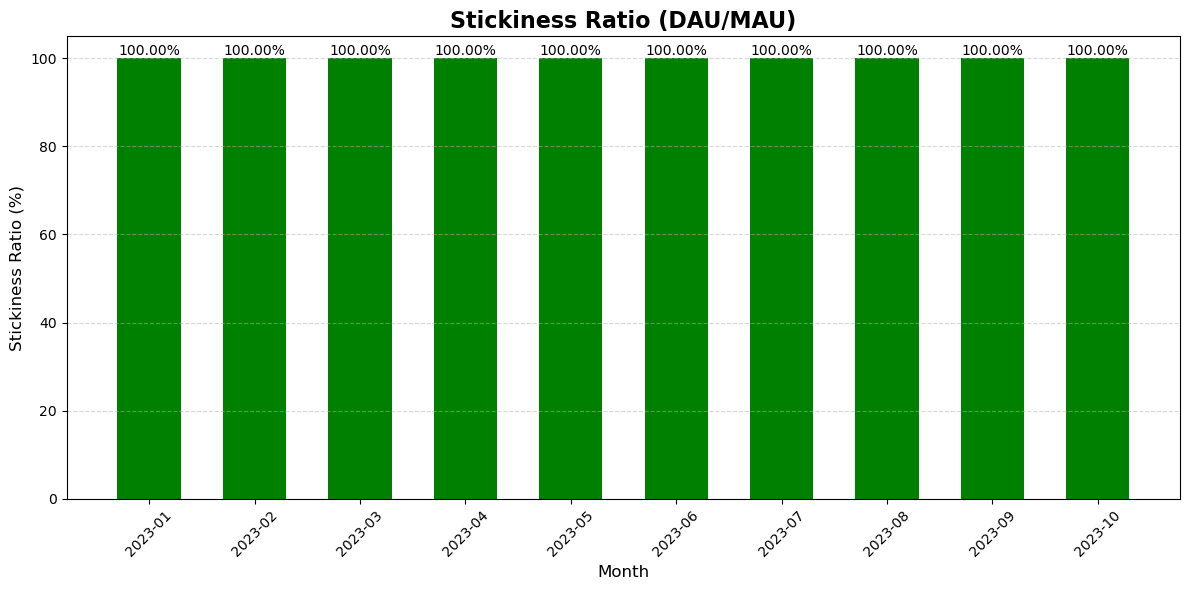

In [167]:

# Convert date columns to datetime
df["Signup_Date"] = pd.to_datetime(df["Signup_Date"])
df["Last_Email_Opened_Date"] = pd.to_datetime(df["Last_Email_Opened_Date"])
df["Last_Order_Date"] = pd.to_datetime(df["Last_Order_Date"])

# Combine all activity dates into a single column
activity_dates = pd.concat([df["Signup_Date"], df["Last_Email_Opened_Date"], df["Last_Order_Date"]])

# Drop rows with NaT (missing dates)
activity_dates = activity_dates.dropna()

# Extract day and month from activity dates
activity_dates = pd.to_datetime(activity_dates)
activity_dates_df = pd.DataFrame({
    "Date": activity_dates,
    "Day": activity_dates.dt.date,
    "Month": activity_dates.dt.to_period("M"),
    "Merchant_ID": df.loc[activity_dates.index, "Merchant_ID"]  # Include Merchant_ID for unique user counting
})

# Calculate Daily Active Users (DAU)
dau = activity_dates_df.groupby("Day")["Merchant_ID"].nunique().reset_index(name="DAU")

# Calculate Monthly Active Users (MAU)
mau = activity_dates_df.groupby("Month")["Merchant_ID"].nunique().reset_index(name="MAU")

# Calculate average DAU for each month
activity_dates_df["Month"] = activity_dates_df["Date"].dt.to_period("M")
avg_dau = activity_dates_df.groupby("Month")["Merchant_ID"].nunique().reset_index(name="Avg_DAU")

# Merge MAU and average DAU
stickiness_data = mau.merge(avg_dau, on="Month", how="left")

# Calculate Stickiness Ratio for each month
stickiness_data["Stickiness Ratio"] = (stickiness_data["Avg_DAU"] / stickiness_data["MAU"]) * 100

# Convert 'Month' to string for better plotting
stickiness_data["Month"] = stickiness_data["Month"].astype(str)

# Print Stickiness Ratio
print("\nStickiness Ratio:")
print(stickiness_data[["Month", "Stickiness Ratio"]])

# Visualization
# Bar plot for Stickiness Ratio
plt.figure(figsize=(12, 6))
bars = plt.bar(stickiness_data["Month"], stickiness_data["Stickiness Ratio"], color="green", width=0.6)
plt.title("Stickiness Ratio (DAU/MAU)", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Stickiness Ratio (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}%", 
             ha="center", va="bottom", fontsize=10, color="black")

plt.tight_layout()
plt.show()


Stickiness Ratio:
     Month  Stickiness Ratio
0  2023-01             100.0
1  2023-02             100.0
2  2023-03             100.0
3  2023-04             100.0
4  2023-05             100.0
5  2023-06             100.0
6  2023-07             100.0
7  2023-08             100.0
8  2023-09             100.0
9  2023-10             100.0


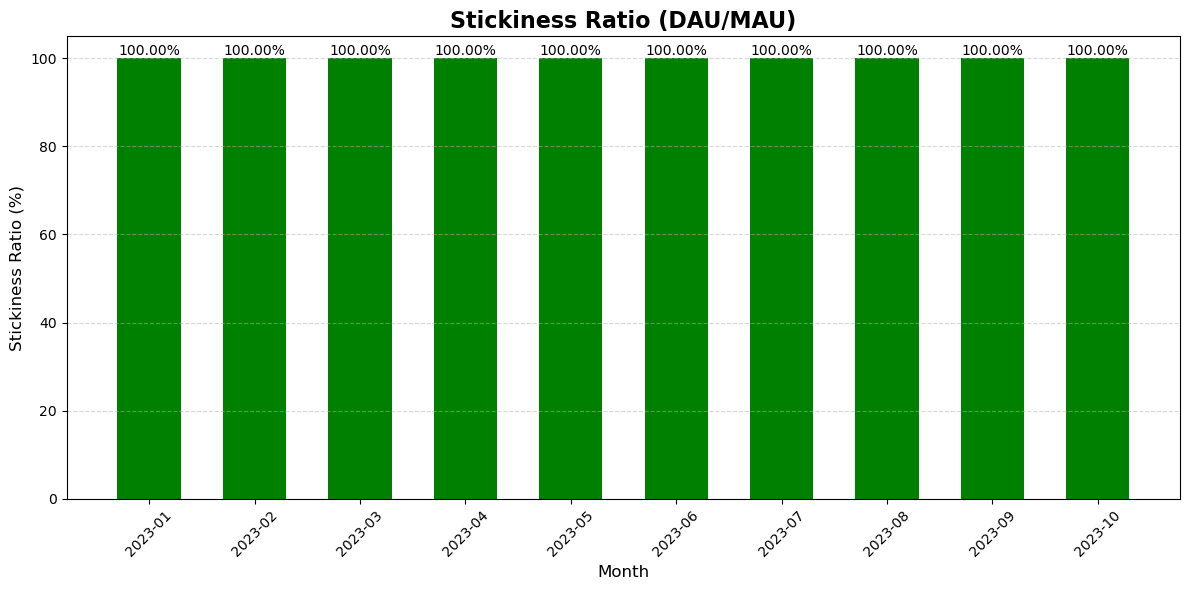

In [171]:

# Convert date columns to datetime
df["Signup_Date"] = pd.to_datetime(df["Signup_Date"])
df["Last_Email_Opened_Date"] = pd.to_datetime(df["Last_Email_Opened_Date"])
df["Last_Order_Date"] = pd.to_datetime(df["Last_Order_Date"])

# Combine all activity dates into a single column
activity_dates = pd.concat([df["Signup_Date"], df["Last_Email_Opened_Date"], df["Last_Order_Date"]])

# Drop rows with NaT (missing dates)
activity_dates = activity_dates.dropna()

# Extract day and month from activity dates
activity_dates = pd.to_datetime(activity_dates)
activity_dates_df = pd.DataFrame({
    "Date": activity_dates,
    "Day": activity_dates.dt.date,
    "Month": activity_dates.dt.to_period("M"),
    "Merchant_ID": df.loc[activity_dates.index, "Merchant_ID"]  # Include Merchant_ID for unique user counting
})

# Calculate Daily Active Users (DAU)
dau = activity_dates_df.groupby("Day")["Merchant_ID"].nunique().reset_index(name="DAU")

# Calculate Monthly Active Users (MAU)
mau = activity_dates_df.groupby("Month")["Merchant_ID"].nunique().reset_index(name="MAU")

# Calculate average DAU for each month
activity_dates_df["Month"] = activity_dates_df["Date"].dt.to_period("M")
avg_dau = activity_dates_df.groupby("Month")["Merchant_ID"].nunique().reset_index(name="Avg_DAU")

# Merge MAU and average DAU
stickiness_data = mau.merge(avg_dau, on="Month", how="left")

# Calculate Stickiness Ratio for each month
stickiness_data["Stickiness Ratio"] = (stickiness_data["Avg_DAU"] / stickiness_data["MAU"]) * 100

# Convert 'Month' to string for better plotting
stickiness_data["Month"] = stickiness_data["Month"].astype(str)

# Print Stickiness Ratio
print("\nStickiness Ratio:")
print(stickiness_data[["Month", "Stickiness Ratio"]])

# Visualization
# Bar plot for Stickiness Ratio
plt.figure(figsize=(12, 6))
bars = plt.bar(stickiness_data["Month"], stickiness_data["Stickiness Ratio"], color="green", width=0.6)
plt.title("Stickiness Ratio (DAU/MAU)", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Stickiness Ratio (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}%", 
             ha="center", va="bottom", fontsize=10, color="black")

plt.tight_layout()
plt.show()



Monthly Active Users (MAU):
     Month  MAU
0  2023-01   31
1  2023-02   28
2  2023-03   31
3  2023-04   30
4  2023-05   31
5  2023-06   30
6  2023-07   29
7  2023-08   23
8  2023-09   28
9  2023-10   24


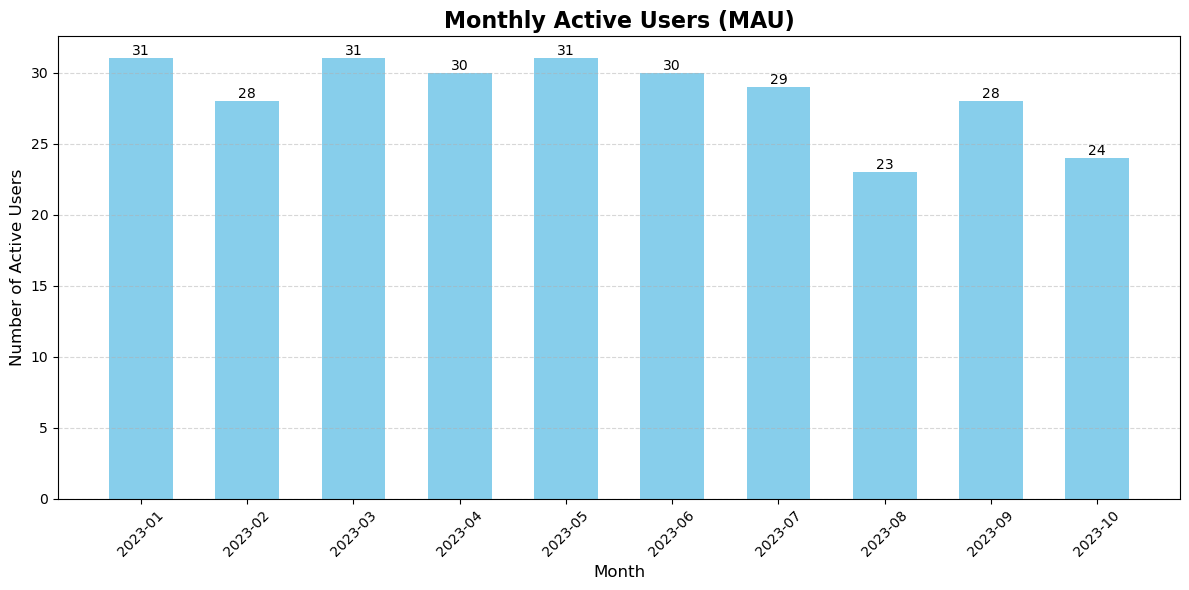

In [41]:


# Convert date columns to datetime
df["Signup_Date"] = pd.to_datetime(df["Signup_Date"])
df["Last_Email_Opened_Date"] = pd.to_datetime(df["Last_Email_Opened_Date"])
df["Last_Order_Date"] = pd.to_datetime(df["Last_Order_Date"])

# Combine all activity dates into a single column
activity_dates = pd.concat([df["Signup_Date"], df["Last_Email_Opened_Date"], df["Last_Order_Date"]])

# Drop rows with NaT (missing dates)
activity_dates = activity_dates.dropna()

# Extract month from activity dates
activity_dates = pd.to_datetime(activity_dates)
activity_dates_df = pd.DataFrame({
    "Date": activity_dates,
    "Month": activity_dates.dt.to_period("M")  # Convert to monthly period
})

# Calculate Monthly Active Users (MAU)
mau = activity_dates_df.groupby("Month")["Date"].nunique().reset_index(name="MAU")

# Create a complete date range for all months in the dataset
min_month = activity_dates_df["Month"].min()
max_month = activity_dates_df["Month"].max()
complete_months = pd.period_range(start=min_month, end=max_month, freq="M")

# Merge with the MAU data to include all months (even those with zero activity)
complete_mau = pd.DataFrame({"Month": complete_months})
complete_mau = complete_mau.merge(mau, on="Month", how="left").fillna(0)  # Fill missing months with 0

# Convert 'Month' to string for better plotting
complete_mau["Month"] = complete_mau["Month"].astype(str)

# Print MAU
print("\nMonthly Active Users (MAU):")
print(complete_mau)

# Visualization
# Bar plot for MAU with refinements
plt.figure(figsize=(12, 6))
bars = plt.bar(complete_mau["Month"], complete_mau["MAU"], color="skyblue", width=0.6)  # Narrower bars and custom color
plt.title("Monthly Active Users (MAU)", fontsize=16, fontweight="bold")  # Larger and bold title
plt.xlabel("Month", fontsize=12)  # Larger x-axis label
plt.ylabel("Number of Active Users", fontsize=12)  # Larger y-axis label
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels and adjust font size
plt.yticks(fontsize=10)  # Adjust y-axis tick font size
plt.grid(axis="y", linestyle="--", alpha=0.5)  # Lighter grid lines

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{int(height)}", 
             ha="center", va="bottom", fontsize=10, color="black")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


Stickiness Ratio:
     Month  Stickiness Ratio
0  2023-01         33.333333
1  2023-03        100.000000
2  2023-05        100.000000
3  2023-06          7.142857
4  2023-07          4.545455
5  2023-08          5.555556
6  2023-09          4.166667
7  2023-10          4.166667


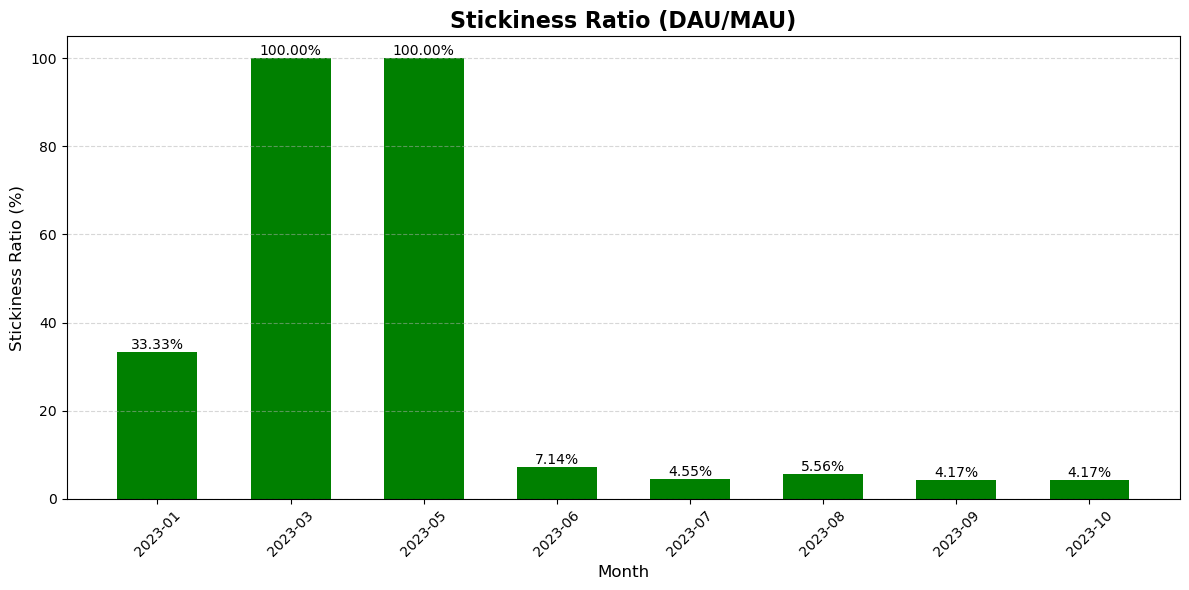

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert date columns to datetime
df["Signup_Date"] = pd.to_datetime(df["Signup_Date"])
df["Last_Email_Opened_Date"] = pd.to_datetime(df["Last_Email_Opened_Date"])
df["Last_Order_Date"] = pd.to_datetime(df["Last_Order_Date"])

# Create a new column for the latest activity date for each user
df["Latest_Activity_Date"] = df[["Signup_Date", "Last_Email_Opened_Date", "Last_Order_Date"]].max(axis=1)

# Drop rows with missing activity dates
df = df.dropna(subset=["Latest_Activity_Date"])

# Extract day and month from the latest activity date
df["Day"] = df["Latest_Activity_Date"].dt.date
df["Month"] = df["Latest_Activity_Date"].dt.to_period("M")

# Calculate Daily Active Users (DAU)
dau = df.groupby("Day")["Merchant_ID"].nunique().reset_index(name="DAU")

# Calculate Monthly Active Users (MAU)
mau = df.groupby("Month")["Merchant_ID"].nunique().reset_index(name="MAU")

# Calculate average DAU for each month
avg_dau = df.groupby(["Month", "Day"])["Merchant_ID"].nunique().reset_index(name="DAU")
avg_dau = avg_dau.groupby("Month")["DAU"].mean().reset_index(name="Avg_DAU")

# Merge MAU and average DAU
stickiness_data = mau.merge(avg_dau, on="Month", how="left")

# Calculate Stickiness Ratio for each month
stickiness_data["Stickiness Ratio"] = (stickiness_data["Avg_DAU"] / stickiness_data["MAU"]) * 100

# Convert 'Month' to string for better plotting
stickiness_data["Month"] = stickiness_data["Month"].astype(str)

# Print Stickiness Ratio
print("\nStickiness Ratio:")
print(stickiness_data[["Month", "Stickiness Ratio"]])

# Visualization
# Bar plot for Stickiness Ratio
plt.figure(figsize=(12, 6))
bars = plt.bar(stickiness_data["Month"], stickiness_data["Stickiness Ratio"], color="green", width=0.6)
plt.title("Stickiness Ratio (DAU/MAU)", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Stickiness Ratio (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}%", 
             ha="center", va="bottom", fontsize=10, color="black")

plt.tight_layout()
plt.show()


Stickiness Ratio:
     Month  Stickiness Ratio
0  2023-01         33.333333
1  2023-03        100.000000
2  2023-05        100.000000
3  2023-06          7.142857
4  2023-07          4.545455
5  2023-08          5.555556
6  2023-09          4.166667
7  2023-10          4.166667


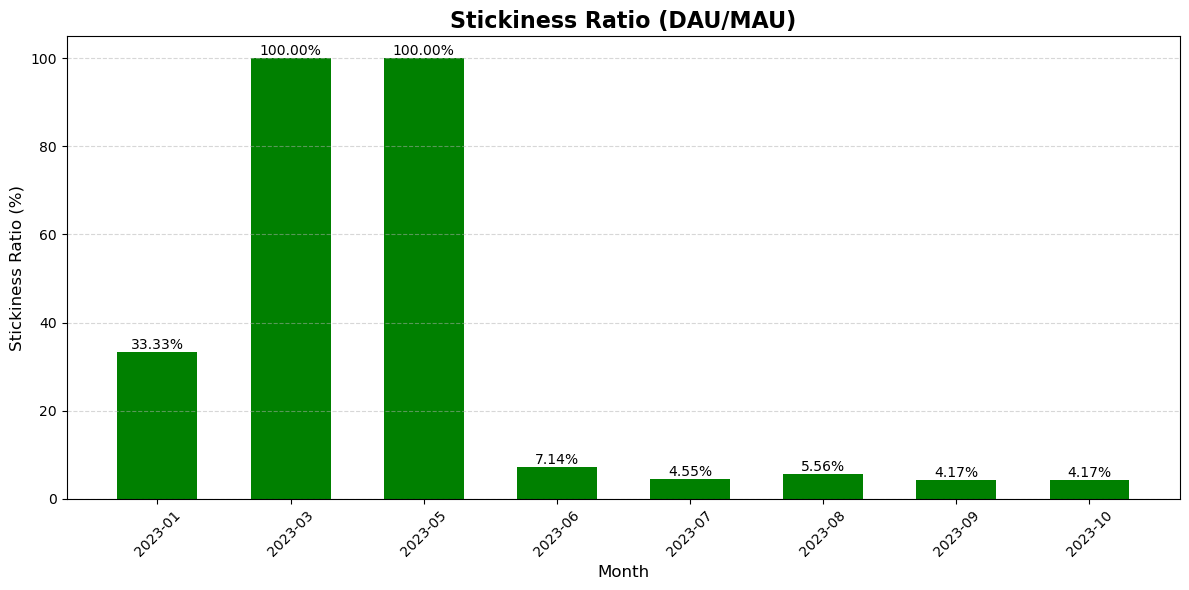

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert date columns to datetime
df["Signup_Date"] = pd.to_datetime(df["Signup_Date"])
df["Last_Email_Opened_Date"] = pd.to_datetime(df["Last_Email_Opened_Date"])
df["Last_Order_Date"] = pd.to_datetime(df["Last_Order_Date"])

# Create a new column for the latest activity date for each user
df["Latest_Activity_Date"] = df[["Signup_Date", "Last_Email_Opened_Date", "Last_Order_Date"]].max(axis=1)

# Drop rows with missing activity dates
df = df.dropna(subset=["Latest_Activity_Date"])

# Extract day and month from the latest activity date
df["Day"] = df["Latest_Activity_Date"].dt.date
df["Month"] = df["Latest_Activity_Date"].dt.to_period("M")

# Calculate Daily Active Users (DAU)
dau = df.groupby("Day")["Merchant_ID"].nunique().reset_index(name="DAU")

# Calculate Monthly Active Users (MAU)
mau = df.groupby("Month")["Merchant_ID"].nunique().reset_index(name="MAU")

# Calculate average DAU for each month
avg_dau = df.groupby(["Month", "Day"])["Merchant_ID"].nunique().reset_index(name="DAU")
avg_dau = avg_dau.groupby("Month")["DAU"].mean().reset_index(name="Avg_DAU")

# Merge MAU and average DAU
stickiness_data = mau.merge(avg_dau, on="Month", how="left")

# Calculate Stickiness Ratio for each month
stickiness_data["Stickiness Ratio"] = (stickiness_data["Avg_DAU"] / stickiness_data["MAU"]) * 100

# Convert 'Month' to string for better plotting
stickiness_data["Month"] = stickiness_data["Month"].astype(str)

# Print Stickiness Ratio
print("\nStickiness Ratio:")
print(stickiness_data[["Month", "Stickiness Ratio"]])

# Visualization
# Bar plot for Stickiness Ratio
plt.figure(figsize=(12, 6))
bars = plt.bar(stickiness_data["Month"], stickiness_data["Stickiness Ratio"], color="green", width=0.6)
plt.title("Stickiness Ratio (DAU/MAU)", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Stickiness Ratio (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}%", 
             ha="center", va="bottom", fontsize=10, color="black")

plt.tight_layout()
plt.show()

In [45]:

# Convert date columns to datetime
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'])
df['Last_Email_Opened_Date'] = pd.to_datetime(df['Last_Email_Opened_Date'])
df['Last_Order_Date'] = pd.to_datetime(df['Last_Order_Date'])

# Define active users as those who have either opened an email or placed an order
df['Active'] = (df['Email_Status'] == 'Opened') | (df['Total_Orders'] > 0)

# Filter the dataframe to only include active users
active_users = df[df['Active']]

# Calculate DAU (Daily Active Users)
active_users['Date'] = active_users[['Last_Email_Opened_Date', 'Last_Order_Date']].max(axis=1)
dau = active_users.groupby(active_users['Date'].dt.date)['Merchant_ID'].nunique()

# Convert dau.index to DateTimeIndex for period conversion
dau.index = pd.to_datetime(dau.index)

# Calculate MAU (Monthly Active Users)
active_users['Month'] = active_users['Date'].dt.to_period('M')
mau = active_users.groupby(active_users['Month'])['Merchant_ID'].nunique()

# Calculate Stickiness Ratio per month
# Group DAU by month and calculate the mean DAU for each month
mean_dau_per_month = dau.groupby(dau.index.to_period('M')).mean()

# Calculate Stickiness Ratio per month
stickiness_ratio_per_month = mean_dau_per_month / mau

# Calculate overall Stickiness Ratio (average of monthly Stickiness Ratios)
overall_stickiness_ratio = stickiness_ratio_per_month.mean()

# Print results
print("Stickiness Ratio per Month:\n", stickiness_ratio_per_month)
print("\nOverall Stickiness Ratio:", overall_stickiness_ratio)

Stickiness Ratio per Month:
 Date
2023-01    1.000000
2023-06    0.066667
2023-07    0.052632
2023-08    0.055556
2023-09    0.041667
2023-10    0.041667
Freq: M, Name: Merchant_ID, dtype: float64

Overall Stickiness Ratio: 0.20969785575048736


In [87]:

# Count missing values in Last_Order_Date
missing_last_order = df["Last_Order_Date"].isna().sum()
print(f"Number of users with missing Last_Order_Date: {missing_last_order}")


Number of users with missing Last_Order_Date: 0


In [49]:

# Convert date columns to datetime
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'])
df['Last_Email_Opened_Date'] = pd.to_datetime(df['Last_Email_Opened_Date'])
df['Last_Order_Date'] = pd.to_datetime(df['Last_Order_Date'])

# Define active users as those who have either opened an email or placed an order
df['Active'] = (df['Email_Status'] == 'Opened') | (df['Total_Orders'] > 0)

# Filter the dataframe to only include active users
active_users = df[df['Active']]

# Calculate DAU (Daily Active Users)
# Use the latest date between Last_Email_Opened_Date and Last_Order_Date as the activity date
active_users['Date'] = active_users[['Last_Email_Opened_Date', 'Last_Order_Date']].max(axis=1)

# Group by date and count unique Merchant_IDs
dau = active_users.groupby(active_users['Date'].dt.date)['Merchant_ID'].nunique()

# Convert dau.index to DateTimeIndex for period conversion
dau.index = pd.to_datetime(dau.index)

# Calculate MAU (Monthly Active Users)
# Group by month and count unique Merchant_IDs
active_users['Month'] = active_users['Date'].dt.to_period('M')
mau = active_users.groupby(active_users['Month'])['Merchant_ID'].nunique()

# Calculate Stickiness Ratio per month
# Group DAU by month and calculate the mean DAU for each month
mean_dau_per_month = dau.groupby(dau.index.to_period('M')).mean()

# Calculate Stickiness Ratio per month (as a percentage)
stickiness_ratio_per_month = (mean_dau_per_month / mau) * 100

# Calculate overall Stickiness Ratio (average of monthly Stickiness Ratios, as a percentage)
overall_stickiness_ratio = stickiness_ratio_per_month.mean()

# Print results
print("DAU (Daily Active Users):\n", dau)
print("\nMAU (Monthly Active Users):\n", mau)
print("\nStickiness Ratio per Month (%):\n", stickiness_ratio_per_month)
print("\nOverall Stickiness Ratio (%):", overall_stickiness_ratio)

DAU (Daily Active Users):
 Date
2023-01-01    7
2023-06-01    1
2023-06-02    1
2023-06-04    1
2023-06-05    2
             ..
2023-10-23    3
2023-10-24    2
2023-10-25    6
2023-10-26    4
2023-10-28    1
Name: Merchant_ID, Length: 101, dtype: int64

MAU (Monthly Active Users):
 Month
2023-01     7
2023-06    18
2023-07    30
2023-08    28
2023-09    53
2023-10    64
Freq: M, Name: Merchant_ID, dtype: int64

Stickiness Ratio per Month (%):
 Date
2023-01    100.000000
2023-06      6.666667
2023-07      5.263158
2023-08      5.555556
2023-09      4.166667
2023-10      4.166667
Freq: M, Name: Merchant_ID, dtype: float64

Overall Stickiness Ratio (%): 20.969785575048736


In [51]:

# Convert date columns to datetime
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'])
df['Last_Email_Opened_Date'] = pd.to_datetime(df['Last_Email_Opened_Date'])
df['Last_Order_Date'] = pd.to_datetime(df['Last_Order_Date'])

# Define active users as those who have either opened an email or placed an order
df['Active'] = (df['Email_Status'] == 'Opened') | (df['Total_Orders'] > 0)

# Filter the dataframe to only include active users
active_users = df[df['Active']]

# Calculate DAU (Daily Active Users)
# Use the latest date between Last_Email_Opened_Date and Last_Order_Date as the activity date
active_users['Date'] = active_users[['Last_Email_Opened_Date', 'Last_Order_Date']].max(axis=1)

# Group by date and count unique Merchant_IDs
dau = active_users.groupby(active_users['Date'].dt.date)['Merchant_ID'].nunique()

# Convert dau.index to DateTimeIndex for period conversion
dau.index = pd.to_datetime(dau.index)

# Calculate MAU (Monthly Active Users)
# Group by month and count unique Merchant_IDs
active_users['Month'] = active_users['Date'].dt.to_period('M')
mau = active_users.groupby(active_users['Month'])['Merchant_ID'].nunique()

# Calculate the number of days in each month
days_in_month = dau.index.to_period('M').value_counts().sort_index()

# Calculate mean DAU per month
mean_dau_per_month = dau.groupby(dau.index.to_period('M')).sum() / days_in_month

# Calculate Stickiness Ratio per month (as a percentage)
stickiness_ratio_per_month = (mean_dau_per_month / mau) * 100

# Calculate overall Stickiness Ratio (average of monthly Stickiness Ratios, as a percentage)
overall_stickiness_ratio = stickiness_ratio_per_month.mean()

# Print results
print("DAU (Daily Active Users):\n", dau)
print("\nMAU (Monthly Active Users):\n", mau)
print("\nStickiness Ratio per Month (%):\n", stickiness_ratio_per_month)
print("\nOverall Stickiness Ratio (%):", overall_stickiness_ratio)


DAU (Daily Active Users):
 Date
2023-01-01    7
2023-06-01    1
2023-06-02    1
2023-06-04    1
2023-06-05    2
             ..
2023-10-23    3
2023-10-24    2
2023-10-25    6
2023-10-26    4
2023-10-28    1
Name: Merchant_ID, Length: 101, dtype: int64

MAU (Monthly Active Users):
 Month
2023-01     7
2023-06    18
2023-07    30
2023-08    28
2023-09    53
2023-10    64
Freq: M, Name: Merchant_ID, dtype: int64

Stickiness Ratio per Month (%):
 Date
2023-01    100.000000
2023-06      6.666667
2023-07      5.263158
2023-08      5.555556
2023-09      4.166667
2023-10      4.166667
Freq: M, dtype: float64

Overall Stickiness Ratio (%): 20.969785575048736



Monthly Active Users (MAU):
      Month   MAU
0   2023-01  31.0
1   2023-02  28.0
2   2023-03  31.0
3   2023-04  30.0
4   2023-05  31.0
5   2023-06  30.0
6   2023-07  29.0
7   2023-08  23.0
8   2023-09  28.0
9   2023-10  24.0
10  2023-11   0.0


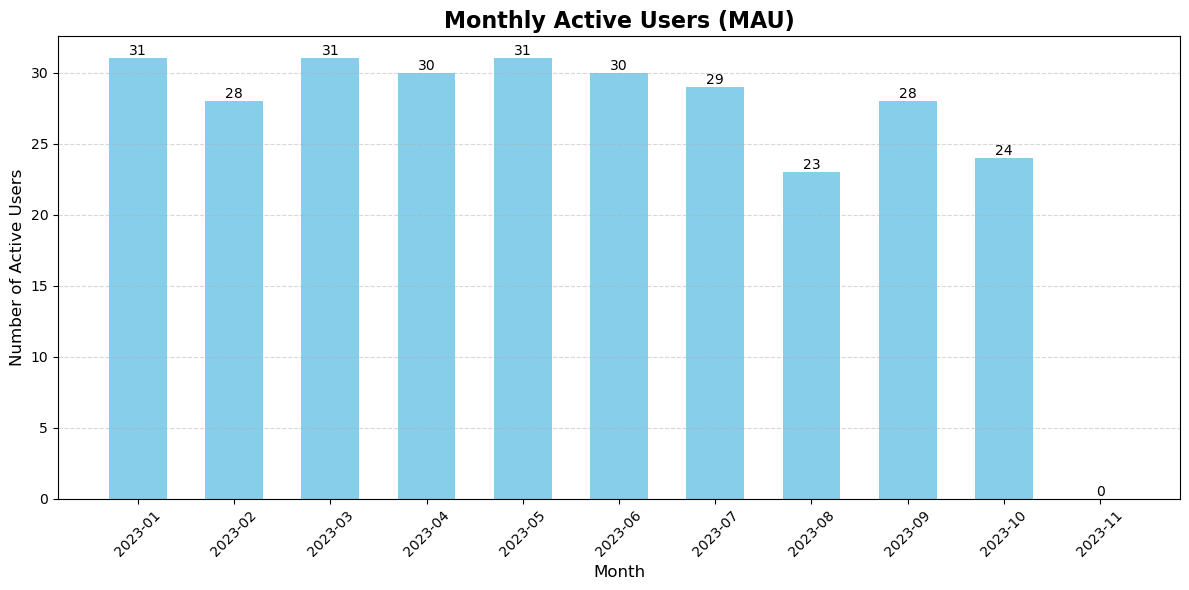

In [53]:



# Convert date columns to datetime
df["Signup_Date"] = pd.to_datetime(df["Signup_Date"])
df["Last_Email_Opened_Date"] = pd.to_datetime(df["Last_Email_Opened_Date"])
df["Last_Order_Date"] = pd.to_datetime(df["Last_Order_Date"])

# Combine all activity dates into a single column
activity_dates = pd.concat([df["Signup_Date"], df["Last_Email_Opened_Date"], df["Last_Order_Date"]])

# Drop rows with NaT (missing dates)
activity_dates = activity_dates.dropna()

# Extract month from activity dates
activity_dates = pd.to_datetime(activity_dates)
activity_dates_df = pd.DataFrame({
    "Date": activity_dates,
    "Month": activity_dates.dt.to_period("M")  # Convert to monthly period
})

# Calculate Monthly Active Users (MAU)
mau = activity_dates_df.groupby("Month")["Date"].nunique().reset_index(name="MAU")

# Create a complete date range for 11 months (e.g., January to November 2023)
complete_months = pd.period_range(start="2023-01", end="2023-11", freq="M")

# Merge with the MAU data to include all months (even those with zero activity)
complete_mau = pd.DataFrame({"Month": complete_months})
complete_mau = complete_mau.merge(mau, on="Month", how="left").fillna(0)  # Fill missing months with 0

# Convert 'Month' to string for better plotting
complete_mau["Month"] = complete_mau["Month"].astype(str)

# Print MAU
print("\nMonthly Active Users (MAU):")
print(complete_mau)

# Visualization
# Bar plot for MAU with refinements
plt.figure(figsize=(12, 6))
bars = plt.bar(complete_mau["Month"], complete_mau["MAU"], color="skyblue", width=0.6)  # Narrower bars and custom color
plt.title("Monthly Active Users (MAU)", fontsize=16, fontweight="bold")  # Larger and bold title
plt.xlabel("Month", fontsize=12)  # Larger x-axis label
plt.ylabel("Number of Active Users", fontsize=12)  # Larger y-axis label
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels and adjust font size
plt.yticks(fontsize=10)  # Adjust y-axis tick font size
plt.grid(axis="y", linestyle="--", alpha=0.5)  # Lighter grid lines

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{int(height)}", 
             ha="center", va="bottom", fontsize=10, color="black")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlbel'

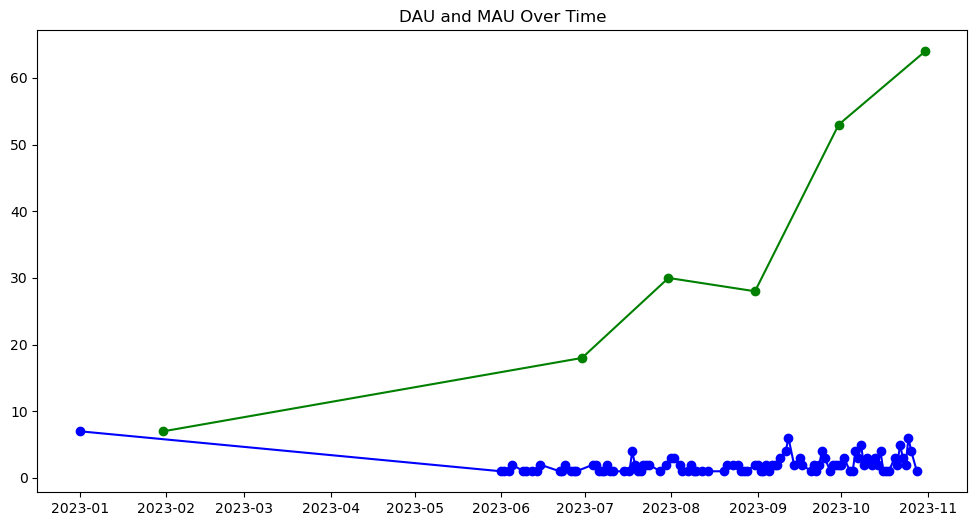

In [123]:

# Plot DAU and MAU Together (for comparison)
plt.figure(figsize=(12, 6))
plt.plot(daily_activity.index, daily_activity.values, marker='o', color='blue', label='DAU')
plt.plot(monthly_activity.index, monthly_activity.values, marker='o', color='green', label='MAU')
plt.title('DAU and MAU Over Time')
plt.xlbel('Date')
plt.ylabel('Number of Active Merchants')
plt.grid(True)
plt.legend()
plt.show()

In [125]:


# Combine all activity dates into a single column
activity_dates = pd.concat([df["Signup_Date"], df["Last_Email_Opened_Date"], df["Last_Order_Date"]])

# Drop rows with NaT (missing dates)
activity_dates = activity_dates.dropna()

# Extract day and month from activity dates
activity_dates = pd.to_datetime(activity_dates)
activity_dates_df = pd.DataFrame({
    "Date": activity_dates,
    "Day": activity_dates.dt.date,
    "Month": activity_dates.dt.to_period("M")
})

# Calculate Daily Active Users (DAU)
dau = activity_dates_df.groupby("Day")["Date"].nunique().reset_index(name="DAU")

# Calculate Monthly Active Users (MAU)
mau = activity_dates_df.groupby("Month")["Date"].nunique().reset_index(name="MAU")

# Print DAU and MAU
print("\nDaily Active Users (DAU):")
print(dau)

print("\nMonthly Active Users (MAU):")
print(mau)




Daily Active Users (DAU):
            Day  DAU
0    2023-01-01    1
1    2023-01-02    1
2    2023-01-03    1
3    2023-01-04    1
4    2023-01-05    1
..          ...  ...
280  2023-10-23    1
281  2023-10-24    1
282  2023-10-25    1
283  2023-10-26    1
284  2023-10-28    1

[285 rows x 2 columns]

Monthly Active Users (MAU):
     Month  MAU
0  2023-01   31
1  2023-02   28
2  2023-03   31
3  2023-04   30
4  2023-05   31
5  2023-06   30
6  2023-07   29
7  2023-08   23
8  2023-09   28
9  2023-10   24



Monthly Active Users (MAU):
     Month  MAU
0  2023-01   31
1  2023-02   28
2  2023-03   31
3  2023-04   30
4  2023-05   31
5  2023-06   30
6  2023-07   29
7  2023-08   23
8  2023-09   28
9  2023-10   24


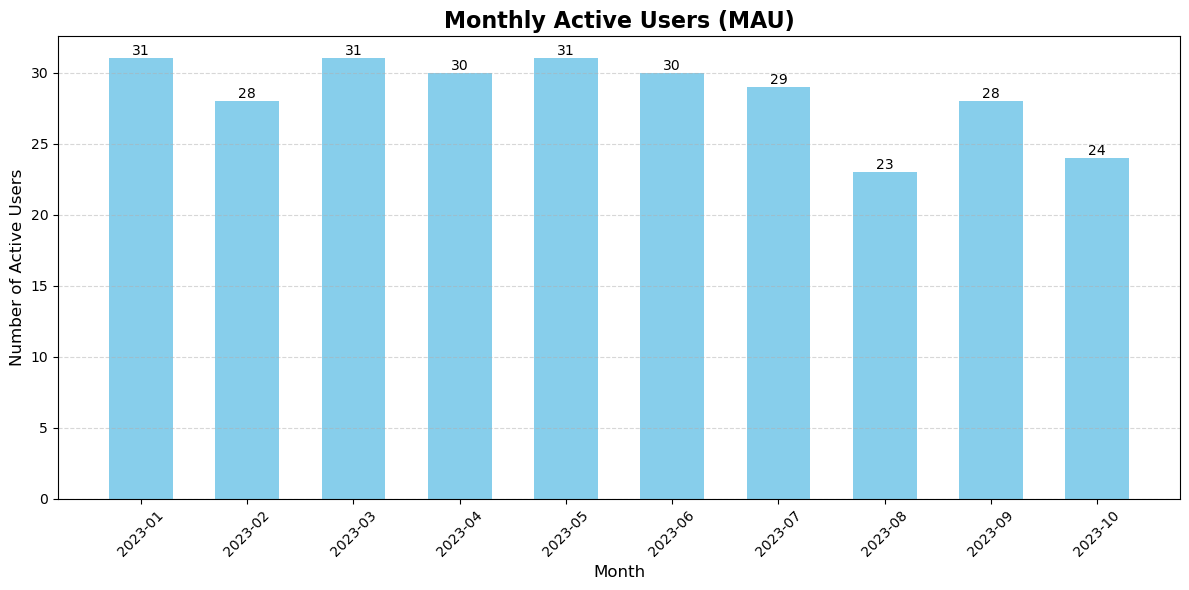

In [127]:
#mau = activity_dates_df.groupby("Month")["Date"].nunique().reset_index(name="MAU")

# Convert 'Month' to string for better plotting
mau["Month"] = mau["Month"].astype(str)

# Print MAU
print("\nMonthly Active Users (MAU):")
print(mau)

# Visualization
# Bar plot for MAU with refinements
plt.figure(figsize=(12, 6))
bars = plt.bar(mau["Month"], mau["MAU"], color="skyblue", width=0.6)  # Narrower bars and custom color
plt.title("Monthly Active Users (MAU)", fontsize=16, fontweight="bold")  # Larger and bold title
plt.xlabel("Month", fontsize=12)  # Larger x-axis label
plt.ylabel("Number of Active Users", fontsize=12)  # Larger y-axis label
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels and adjust font size
plt.yticks(fontsize=10)  # Adjust y-axis tick font size
plt.grid(axis="y", linestyle="--", alpha=0.5)  # Lighter grid lines

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{int(height)}", 
             ha="center", va="bottom", fontsize=10, color="black")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()



In [129]:

# Convert date columns to datetime
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'])
df['Last_Email_Opened_Date'] = pd.to_datetime(df['Last_Email_Opened_Date'])
df['Last_Order_Date'] = pd.to_datetime(df['Last_Order_Date'])

# Define activity: Either placed an order or opened an email
df['Last_Activity_Date'] = df[['Last_Order_Date', 'Last_Email_Opened_Date']].max(axis=1)

# Calculate DAU for each day
daily_activity = df.groupby(df['Last_Activity_Date'].dt.date)['Merchant_ID'].nunique()

# Identify the drop
drop_date = daily_activity.idxmin()  # Date with the lowest DAU
drop_value = daily_activity.min()  # Lowest DAU value
print(f"Sudden drop detected on {drop_date} with {drop_value} active merchants.")

# Analyze activity before and after the drop
before_drop = df[df['Last_Activity_Date'].dt.date < drop_date]
after_drop = df[df['Last_Activity_Date'].dt.date >= drop_date]

# Compare key metrics
print("\nKey Metrics Before Drop:")
print(f"Average Daily Active Merchants: {before_drop['Last_Activity_Date'].dt.date.value_counts().mean():.2f}")
print(f"Email Open Rate: {(before_drop['Email_Status'] == 'Opened').mean() * 100:.2f}%")
print(f"Order Rate: {(before_drop['Total_Orders'] > 0).mean() * 100:.2f}%")

print("\nKey Metrics After Drop:")
print(f"Average Daily Active Merchants: {after_drop['Last_Activity_Date'].dt.date.value_counts().mean():.2f}")
print(f"Email Open Rate: {(after_drop['Email_Status'] == 'Opened').mean() * 100:.2f}%")
print(f"Order Rate: {(after_drop['Total_Orders'] > 0).mean() * 100:.2f}%")

Sudden drop detected on 2023-06-01 with 1 active merchants.

Key Metrics Before Drop:
Average Daily Active Merchants: 7.00
Email Open Rate: 28.57%
Order Rate: 100.00%

Key Metrics After Drop:
Average Daily Active Merchants: 1.93
Email Open Rate: 52.85%
Order Rate: 97.93%


In [131]:
# Identify inactive merchants after the drop
inactive_merchants = df[
    (df['Last_Activity_Date'].dt.date >= drop_date) &
    (df['Total_Orders'] == 0)  # Merchants who haven't placed an order
]

print(f"Number of Inactive Merchants After Drop: {len(inactive_merchants)}")

# Send personalized re-engagement emails
inactive_merchants['Re_Engagement_Email'] = inactive_merchants['Merchant_Email'].apply(
    lambda x: f"Hi Merchant, we miss you! Here's a 10% discount on your next order. Use code WELCOMEBACK at checkout."
)

# Display sample re-engagement emails
print("\nSample Re-Engagement Emails:")
print(inactive_merchants[['Merchant_Email', 'Re_Engagement_Email']].head())

Number of Inactive Merchants After Drop: 4

Sample Re-Engagement Emails:
              Merchant_Email  \
0      merchant1@example.com   
23    merchant24@example.com   
149  merchant150@example.com   
177  merchant178@example.com   

                                   Re_Engagement_Email  
0    Hi Merchant, we miss you! Here's a 10% discoun...  
23   Hi Merchant, we miss you! Here's a 10% discoun...  
149  Hi Merchant, we miss you! Here's a 10% discoun...  
177  Hi Merchant, we miss you! Here's a 10% discoun...  


C:\Users\PanDa\AppData\Local\Temp\ipykernel_8348\3485408961.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive_merchants['Re_Engagement_Email'] = inactive_merchants['Merchant_Email'].apply(


In [133]:
# Convert date columns to datetime
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'])
df['Last_Email_Opened_Date'] = pd.to_datetime(df['Last_Email_Opened_Date'])
df['Last_Order_Date'] = pd.to_datetime(df['Last_Order_Date'])

# Define activity: Either placed an order or opened an email
df['Last_Activity_Date'] = df[['Last_Order_Date', 'Last_Email_Opened_Date']].max(axis=1)

# Calculate DAU for each day
daily_activity = df.groupby(df['Last_Activity_Date'].dt.date)['Merchant_ID'].nunique()

# Identify the drop
drop_date = daily_activity.idxmin()  # Date with the lowest DAU
drop_value = daily_activity.min()  # Lowest DAU value
print(f"Sudden drop detected on {drop_date} with {drop_value} active merchants.")

# Analyze activity before and after the drop
before_drop = df[df['Last_Activity_Date'].dt.date < drop_date]
after_drop = df[df['Last_Activity_Date'].dt.date >= drop_date]

# Calculate key metrics
def calculate_metrics(data):
    avg_dau = data['Last_Activity_Date'].dt.date.value_counts().mean()
    email_open_rate = (data['Email_Status'] == 'Opened').mean() * 100
    order_rate = (data['Total_Orders'] > 0).mean() * 100
    return avg_dau, email_open_rate, order_rate

avg_dau_before, email_open_rate_before, order_rate_before = calculate_metrics(before_drop)
avg_dau_after, email_open_rate_after, order_rate_after = calculate_metrics(after_drop)

# Display key metrics
print("\nKey Metrics Before Drop:")
print(f"Average Daily Active Merchants: {avg_dau_before:.2f}")
print(f"Email Open Rate: {email_open_rate_before:.2f}%")
print(f"Order Rate: {order_rate_before:.2f}%")

print("\nKey Metrics After Drop:")
print(f"Average Daily Active Merchants: {avg_dau_after:.2f}")
print(f"Email Open Rate: {email_open_rate_after:.2f}%")
print(f"Order Rate: {order_rate_after:.2f}%")

Sudden drop detected on 2023-06-01 with 1 active merchants.

Key Metrics Before Drop:
Average Daily Active Merchants: 7.00
Email Open Rate: 28.57%
Order Rate: 100.00%

Key Metrics After Drop:
Average Daily Active Merchants: 1.93
Email Open Rate: 52.85%
Order Rate: 97.93%


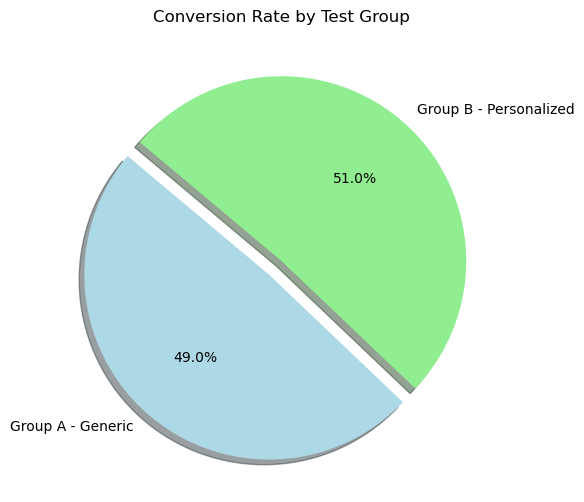

In [55]:
# Define conversion: Merchants who opened an email and placed an order
df['Converted'] = ((df['Email_Status'] == 'Opened') & (df['Total_Orders'] > 0)).astype(int)

# Calculate conversion rate by test group
conversion_rate = df.groupby('Test_Group')['Converted'].mean() * 100

# Data for the pie chart
labels = ['Group A - Generic', 'Group B - Personalized']
sizes = conversion_rate.values  # Conversion rates for each group
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # Highlight the first slice (Group A)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Conversion Rate by Test Group')
plt.show()

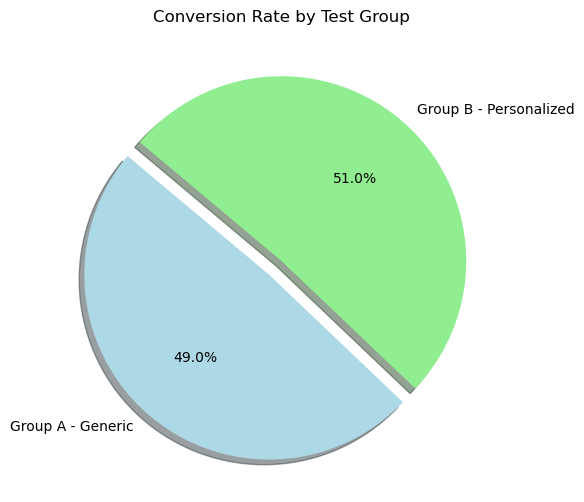

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Define conversion: Merchants who opened an email and placed an order
df['Converted'] = ((df['Email_Status'] == 'Opened') & (df['Total_Orders'] > 0)).astype(int)

# Calculate conversion rate by test group
conversion_rate = df.groupby('Test_Group')['Converted'].mean() * 100

# Data for the pie chart
labels = ['Group A - Generic', 'Group B - Personalized']
sizes = conversion_rate.values  # Conversion rates for each group
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # Highlight the first slice (Group A)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Conversion Rate by Test Group')
plt.show()


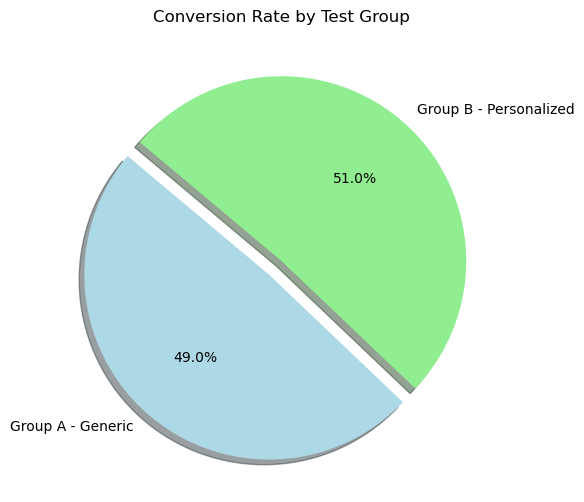

In [39]:
import matplotlib.pyplot as plt

# Define conversion: Merchants who opened an email and placed an order
df['Converted'] = ((df['Email_Status'] == 'Opened') & (df['Total_Orders'] > 0)).astype(int)

# Calculate conversion rate by test group
conversion_rate = df.groupby('Test_Group')['Converted'].mean() * 100

# Data for the pie chart
labels = ['Group A - Generic', 'Group B - Personalized']
sizes = conversion_rate.values  # Conversion rates for each group
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # Highlight the first slice (Group A)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Conversion Rate by Test Group')

# Save the pie chart as an image
plt.savefig('conversion_rate_pie_chart.png', dpi=300, bbox_inches='tight')  # Save as PNG with high quality

# Show the plot
plt.show()

In [36]:
# Calculate average orders per merchant
avg_orders_by_group = df.groupby('Test_Group')['Total_Orders'].mean()
print("Average Orders per Merchant:\n", avg_orders_by_group)

# Calculate conversion rate (percentage of merchants with at least one order)
conversion_rate_by_group = df[df['Total_Orders'] > 0].groupby('Test_Group').size() / df.groupby('Test_Group').size() * 100
print("Conversion Rate (% of merchants with at least one order):\n", conversion_rate_by_group)

Average Orders per Merchant:
 Test_Group
Group A - Generic         25.913462
Group B - Personalized    24.718750
Name: Total_Orders, dtype: float64
Conversion Rate (% of merchants with at least one order):
 Test_Group
Group A - Generic         98.076923
Group B - Personalized    97.916667
dtype: float64


In [34]:
# Group the data by 'Test_Group' and calculate the total orders for each group
total_orders_by_group = df.groupby('Test_Group')['Total_Orders'].sum()

# Display the results
print(total_orders_by_group)


Test_Group
Group A - Generic         2695
Group B - Personalized    2373
Name: Total_Orders, dtype: int64


In [38]:
# Calculate average orders per merchant
avg_orders_by_group = df.groupby('Test_Group')['Total_Orders'].mean()
print("Average Orders per Merchant:\n", avg_orders_by_group)

# Calculate conversion rate (percentage of merchants with at least one order)
conversion_rate_by_group = df[df['Total_Orders'] > 0].groupby('Test_Group').size() / df.groupby('Test_Group').size() * 100
print("Conversion Rate (% of merchants with at least one order):\n", conversion_rate_by_group)

Average Orders per Merchant:
 Test_Group
Group A - Generic         25.913462
Group B - Personalized    24.718750
Name: Total_Orders, dtype: float64
Conversion Rate (% of merchants with at least one order):
 Test_Group
Group A - Generic         98.076923
Group B - Personalized    97.916667
dtype: float64


In [144]:
# Assumptions
revenue_per_order = 100  # Revenue per order = $100

# Calculate total revenue
total_revenue = df['Total_Orders'].sum() * revenue_per_order

# Calculate total number of orders
total_orders = df['Total_Orders'].sum()

# Calculate AOV
aov = total_revenue / total_orders

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Average Order Value (AOV): ${aov:,.2f}")


Total Revenue: $506,800.00
Total Orders: 5068
Average Order Value (AOV): $100.00


In [91]:
import pandas as pd

# Convert date columns to datetime
df["Signup_Date"] = pd.to_datetime(df["Signup_Date"])
df["Last_Email_Opened_Date"] = pd.to_datetime(df["Last_Email_Opened_Date"])
df["Last_Order_Date"] = pd.to_datetime(df["Last_Order_Date"])

# Define scoring criteria
SCORE_SIGNUP = 10
SCORE_EMAIL_OPENED = 5
SCORE_ORDER = 20
SCORE_PER_ORDER = 2
SCORE_EMAIL_BOUNCED = -10
SCORE_EMAIL_SPAM = -20

# Initialize lead score column
df["Lead_Score"] = 0

# Calculate lead scores
df["Lead_Score"] += df["Signup_Date"].notna() * SCORE_SIGNUP  # Signup
df["Lead_Score"] += df["Last_Email_Opened_Date"].notna() * SCORE_EMAIL_OPENED  # Email opened
df["Lead_Score"] += df["Last_Order_Date"].notna() * SCORE_ORDER  # Made a purchase
df["Lead_Score"] += df["Total_Orders"] * SCORE_PER_ORDER  # Total orders
df["Lead_Score"] += (df["Email_Status"] == "Bounced") * SCORE_EMAIL_BOUNCED  # Email bounced
df["Lead_Score"] += (df["Email_Status"] == "Spam Reported") * SCORE_EMAIL_SPAM  # Email marked as spam

# Normalize scores to a range of 0 to 100 (optional)
df["Lead_Score_Normalized"] = (df["Lead_Score"] - df["Lead_Score"].min()) / (df["Lead_Score"].max() - df["Lead_Score"].min()) * 100

# Print the DataFrame with lead scores
print(df[["Merchant_ID", "Lead_Score", "Lead_Score_Normalized"]].head())


   Merchant_ID  Lead_Score  Lead_Score_Normalized
0         4001          35              10.909091
1         4002          43              18.181818
2         4003         123              90.909091
3         4004          41              16.363636
4         4005          45              20.000000


In [42]:
import pandas as pd

# Convert date columns to datetime
df["Signup_Date"] = pd.to_datetime(df["Signup_Date"])
df["Last_Email_Opened_Date"] = pd.to_datetime(df["Last_Email_Opened_Date"])
df["Last_Order_Date"] = pd.to_datetime(df["Last_Order_Date"])

# Define scoring criteria
SCORE_SIGNUP = 10
SCORE_EMAIL_OPENED = 5
SCORE_ORDER = 20
SCORE_PER_ORDER = 2
SCORE_EMAIL_BOUNCED = -10
SCORE_EMAIL_SPAM = -20

# Initialize lead score column
df["Lead_Score"] = 0

# Calculate lead scores
df["Lead_Score"] += df["Signup_Date"].notna() * SCORE_SIGNUP  # Signup
df["Lead_Score"] += df["Last_Email_Opened_Date"].notna() * SCORE_EMAIL_OPENED  # Email opened
df["Lead_Score"] += df["Last_Order_Date"].notna() * SCORE_ORDER  # Made a purchase
df["Lead_Score"] += df["Total_Orders"] * SCORE_PER_ORDER  # Total orders
df["Lead_Score"] += (df["Email_Status"] == "Bounced") * SCORE_EMAIL_BOUNCED  # Email bounced
df["Lead_Score"] += (df["Email_Status"] == "Spam Reported") * SCORE_EMAIL_SPAM  # Email marked as spam

# Normalize scores to a range of 0 to 100 (optional)
df["Lead_Score_Normalized"] = (df["Lead_Score"] - df["Lead_Score"].min()) / (df["Lead_Score"].max() - df["Lead_Score"].min()) * 100

# Print the DataFrame with lead scores
print(df[["Merchant_ID", "Lead_Score", "Lead_Score_Normalized"]].head())
# Save the DataFrame with lead scores to an Excel file
df.to_excel('lead_scores.xlsx', index=False)



   Merchant_ID  Lead_Score  Lead_Score_Normalized
0         4001          35              10.909091
1         4002          43              18.181818
2         4003         123              90.909091
3         4004          41              16.363636
4         4005          45              20.000000


C:\Users\PanDa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PanDa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PanDa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PanDa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

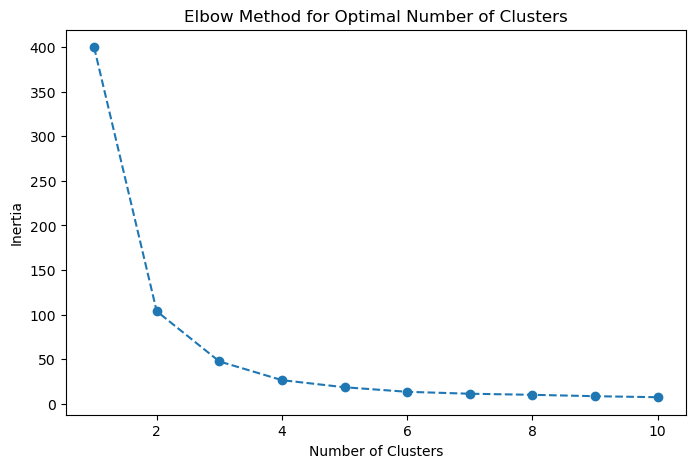

C:\Users\PanDa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Summary:
   Cluster  Total_Orders  Lead_Score
0        0      7.883333   48.266667
1        1     41.041667  115.555556
2        2     24.117647   80.735294


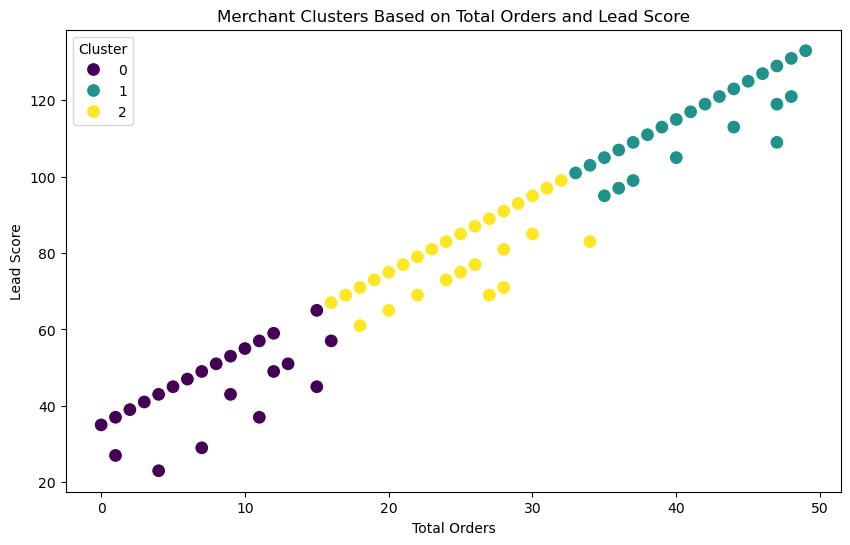

Clustered data saved to clustered_merchants.xlsx


In [97]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Convert date columns to datetime
df["Signup_Date"] = pd.to_datetime(df["Signup_Date"])
df["Last_Email_Opened_Date"] = pd.to_datetime(df["Last_Email_Opened_Date"])
df["Last_Order_Date"] = pd.to_datetime(df["Last_Order_Date"])

# Calculate Lead Score (if not already calculated)
SCORE_SIGNUP = 10
SCORE_EMAIL_OPENED = 5
SCORE_ORDER = 20
SCORE_PER_ORDER = 2
SCORE_EMAIL_BOUNCED = -10
SCORE_EMAIL_SPAM = -20

df["Lead_Score"] = 0
df["Lead_Score"] += df["Signup_Date"].notna() * SCORE_SIGNUP
df["Lead_Score"] += df["Last_Email_Opened_Date"].notna() * SCORE_EMAIL_OPENED
df["Lead_Score"] += df["Last_Order_Date"].notna() * SCORE_ORDER
df["Lead_Score"] += df["Total_Orders"] * SCORE_PER_ORDER
df["Lead_Score"] += (df["Email_Status"] == "Bounced") * SCORE_EMAIL_BOUNCED
df["Lead_Score"] += (df["Email_Status"] == "Spam Reported") * SCORE_EMAIL_SPAM

# Select features for clustering
features = ["Total_Orders", "Lead_Score"]
X = df[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker="o", linestyle="--")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Based on the Elbow Method, choose the optimal number of clusters (e.g., k=3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Analyze the clusters
cluster_summary = df.groupby("Cluster")[features].mean().reset_index()
print("Cluster Summary:")
print(cluster_summary)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Total_Orders", y="Lead_Score", hue="Cluster", data=df, palette="viridis", s=100)
plt.title("Merchant Clusters Based on Total Orders and Lead Score")
plt.xlabel("Total Orders")
plt.ylabel("Lead Score")
plt.show()
# Save the clustered data to an Excel file
output_file = "clustered_merchants.xlsx"
df.to_excel(output_file, index=False)

print(f"Clustered data saved to {output_file}")


In [ ]:
Standard Deviation for Group A: nan
Standard Deviation for Group B: nan

In [146]:
# Assumptions
profit_margin = 0.20  # 20% profit margin

# Calculate total profit
total_profit = total_revenue * profit_margin

# Calculate total number of users
total_users = df['Merchant_ID'].nunique()

# Calculate APU
apu = total_profit / total_users

print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Users: {total_users}")
print(f"Average Profit per User (APU): ${apu:,.2f}")# Assumptions
profit_margin = 0.20  # 20% profit margin

# Calculate total profit
total_profit = total_revenue * profit_margin

# Calculate total number of users
total_users = df['Merchant_ID'].nunique()

# Calculate APU
apu = total_profit / total_users

print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Users: {total_users}")
print(f"Average Profit per User (APU): ${apu:,.2f}")

Total Profit: $101,360.00
Total Users: 200
Average Profit per User (APU): $506.80
Total Profit: $101,360.00
Total Users: 200
Average Profit per User (APU): $506.80


In [148]:
# Calculate Average Revenue per Customer
average_revenue_per_customer = total_revenue / total_users

# Assume Average Customer Lifespan = 1 year
average_customer_lifespan = 1  # In years

# Calculate CLTV
cltv = average_revenue_per_customer * average_customer_lifespan * profit_margin

print(f"Average Revenue per Customer: ${average_revenue_per_customer:,.2f}")
print(f"Average Customer Lifespan: {average_customer_lifespan} year(s)")
print(f"Customer Lifetime Value (CLTV): ${cltv:,.2f}")

Average Revenue per Customer: $2,534.00
Average Customer Lifespan: 1 year(s)
Customer Lifetime Value (CLTV): $506.80


In [150]:
# Calculate Repeat Purchase Rate
repeat_customers = df[df['Total_Orders'] > 1]['Merchant_ID'].nunique()
repeat_purchase_rate = (repeat_customers / total_users) * 100

print(f"Repeat Purchase Rate: {repeat_purchase_rate:.2f}%")

Repeat Purchase Rate: 96.50%


In [154]:
# Define activity: Either placed an order or opened an email
df['Last_Activity_Date'] = df[['Last_Order_Date', 'Last_Email_Opened_Date']].max(axis=1)

# Define churn: Merchants who haven't placed an order in the last 3 months
df['Churn'] = (df['Last_Order_Date'] < (datetime.now() - pd.DateOffset(months=3))).astype(int)

# Calculate RFM scores for segmentation
df['Recency'] = (datetime.now() - df['Last_Order_Date']).dt.days
df['Frequency'] = df['Total_Orders']
df['Monetary'] = df['Total_Orders'] * 100  # Assuming average order value = $100

# RFM Score Calculation
df['R_Score'] = pd.qcut(df['Recency'], q=4, labels=[4, 3, 2, 1])  # Lower recency is better
df['F_Score'] = pd.qcut(df['Frequency'], q=4, labels=[1, 2, 3, 4])  # Higher frequency is better
df['M_Score'] = pd.qcut(df['Monetary'], q=4, labels=[1, 2, 3, 4])  # Higher monetary is better

# Combine RFM scores
df['RFM_Score'] = df['R_Score'].astype(int) + df['F_Score'].astype(int) + df['M_Score'].astype(int)

# RFM Segmentation
def rfm_segment(score):
    if score >= 10:
        return 'High-Value'
    elif score >= 7:
        return 'Mid-Value'
    else:
        return 'Low-Value'

df['RFM_Segment'] = df['RFM_Score'].apply(rfm_segment)

# Churn Probability (Example: Using a simple rule for demonstration)
df['Churn_Probability'] = df['Churn'].apply(lambda x: 0.85 if x == 1 else 0.15)

# Define Segments
# 1. High-Churn-Risk Merchants
high_churn_merchants = df[df['Churn_Probability'] > 0.7]

# 2. High-Value Merchants
high_value_merchants = df[df['RFM_Segment'] == 'High-Value']

# 3. Low-Value Merchants
low_value_merchants = df[df['RFM_Segment'] == 'Low-Value']

# 4. Engaged Merchants (Opened Emails and Placed Orders)
engaged_merchants = df[(df['Email_Status'] == 'Opened') & (df['Total_Orders'] > 0)]

# 5. Inactive Merchants (No Orders in the Last 6 Months)
inactive_merchants = df[df['Last_Order_Date'] < (datetime.now() - pd.DateOffset(months=6))]

# Save Segments to Excel
with pd.ExcelWriter('CRM_Segments.xlsx') as writer:
    high_churn_merchants.to_excel(writer, sheet_name='High_Churn_Risk', index=False)
    high_value_merchants.to_excel(writer, sheet_name='High_Value_Merchants', index=False)
    low_value_merchants.to_excel(writer, sheet_name='Low_Value_Merchants', index=False)
    engaged_merchants.to_excel(writer, sheet_name='Engaged_Merchants', index=False)
    inactive_merchants.to_excel(writer, sheet_name='Inactive_Merchants', index=False)

print("Segments saved to 'CRM_Segments.xlsx'")

Segments saved to 'CRM_Segments.xlsx'


In [99]:
# Define activity: Either placed an order or opened an email
df['Last_Activity_Date'] = df[['Last_Order_Date', 'Last_Email_Opened_Date']].max(axis=1)

# Define churn: Merchants who haven't placed an order in the last 3 months
df['Churn'] = (df['Last_Order_Date'] < (datetime.now() - pd.DateOffset(months=3))).astype(int)

# Calculate RFM scores for segmentation
df['Recency'] = (datetime.now() - df['Last_Order_Date']).dt.days
df['Frequency'] = df['Total_Orders']
df['Monetary'] = df['Total_Orders'] * 100  # Assuming average order value = $100

# RFM Score Calculation
df['R_Score'] = pd.qcut(df['Recency'], q=4, labels=[4, 3, 2, 1])  # Lower recency is better
df['F_Score'] = pd.qcut(df['Frequency'], q=4, labels=[1, 2, 3, 4])  # Higher frequency is better
df['M_Score'] = pd.qcut(df['Monetary'], q=4, labels=[1, 2, 3, 4])  # Higher monetary is better

# Combine RFM scores
df['RFM_Score'] = df['R_Score'].astype(int) + df['F_Score'].astype(int) + df['M_Score'].astype(int)

# RFM Segmentation
def rfm_segment(score):
    if score >= 10:
        return 'High-Value'
    elif score >= 7:
        return 'Mid-Value'
    else:
        return 'Low-Value'

df['RFM_Segment'] = df['RFM_Score'].apply(rfm_segment)

# Churn Probability (Example: Using a simple rule for demonstration)
df['Churn_Probability'] = df['Churn'].apply(lambda x: 0.85 if x == 1 else 0.15)

# Define Segments
# 1. High-Churn-Risk Merchants
high_churn_merchants = df[df['Churn_Probability'] > 0.7]

# 2. High-Value Merchants
high_value_merchants = df[df['RFM_Segment'] == 'High-Value']

# 3. Low-Value Merchants
low_value_merchants = df[df['RFM_Segment'] == 'Low-Value']

# 4. Engaged Merchants (Opened Emails and Placed Orders)
engaged_merchants = df[(df['Email_Status'] == 'Opened') & (df['Total_Orders'] > 0)]

# 5. Inactive Merchants (No Orders in the Last 6 Months)
inactive_merchants = df[df['Last_Order_Date'] < (datetime.now() - pd.DateOffset(months=6))]

# Save Segments to Excel
with pd.ExcelWriter('CRM_Segments.xlsx') as writer:
    high_churn_merchants.to_excel(writer, sheet_name='High_Churn_Risk', index=False)
    high_value_merchants.to_excel(writer, sheet_name='High_Value_Merchants', index=False)
    low_value_merchants.to_excel(writer, sheet_name='Low_Value_Merchants', index=False)
    engaged_merchants.to_excel(writer, sheet_name='Engaged_Merchants', index=False)
    inactive_merchants.to_excel(writer, sheet_name='Inactive_Merchants', index=False)

print("Segments saved to 'CRM_Segments.xlsx'")

Segments saved to 'CRM_Segments.xlsx'


In [105]:

# Create a DataFrame
df = pd.DataFrame(df)

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x="Segment", y="Count", df=df, palette="viridis")

# Add labels and title
plt.title("Customer Segmentation", fontsize=16, fontweight="bold")
plt.xlabel("Customer Segment", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)


# Save the plot as a PNG file
plt.savefig("customer_segmentation.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

ValueError: Could not interpret value `Segment` for `x`. Value is a string, but `data` was not passed.

<Figure size 1000x600 with 0 Axes>

In [158]:
from scipy.stats import ttest_ind

# Define key metrics for Group A and Group B
group_a = df[df['Test_Group'] == 'Group A - Generic']
group_b = df[df['Test_Group'] == 'Group B - Personalized']

# Open Rate
open_rate_a = group_a['Email_Status'].apply(lambda x: 1 if x == 'Opened' else 0)
open_rate_b = group_b['Email_Status'].apply(lambda x: 1 if x == 'Opened' else 0)

# Conversion Rate
conversion_rate_a = group_a[group_a['Email_Status'] == 'Opened']['Total_Orders'].apply(lambda x: 1 if x > 0 else 0)
conversion_rate_b = group_b[group_b['Email_Status'] == 'Opened']['Total_Orders'].apply(lambda x: 1 if x > 0 else 0)

# Revenue per Email
revenue_per_email_a = group_a['Total_Orders'] * 100  # Assuming $100 per order
revenue_per_email_b = group_b['Total_Orders'] * 100

# Perform t-tests
# Open Rate
t_stat_open, p_value_open = ttest_ind(open_rate_a, open_rate_b)

# Conversion Rate
t_stat_conversion, p_value_conversion = ttest_ind(conversion_rate_a, conversion_rate_b)

# Revenue per Email
t_stat_revenue, p_value_revenue = ttest_ind(revenue_per_email_a, revenue_per_email_b)

# Display Results
print("A/B Test Statistical Significance:")
print(f"Open Rate: p-value = {p_value_open:.4f}")
print(f"Conversion Rate: p-value = {p_value_conversion:.4f}")
print(f"Revenue per Email: p-value = {p_value_revenue:.4f}")

# Interpret Results
alpha = 0.05  # Significance level
print("\nInterpretation:")
if p_value_open < alpha:
    print("The difference in Open Rate between Group A and Group B is statistically significant.")
else:
    print("The difference in Open Rate between Group A and Group B is not statistically significant.")

if p_value_conversion < alpha:
    print("The difference in Conversion Rate between Group A and Group B is statistically significant.")
else:
    print("The difference in Conversion Rate between Group A and Group B is not statistically significant.")

if p_value_revenue < alpha:
    print("The difference in Revenue per Email between Group A and Group B is statistically significant.")
else:
    print("The difference in Revenue per Email between Group A and Group B is not statistically significant.")

A/B Test Statistical Significance:
Open Rate: p-value = 0.7611
Conversion Rate: p-value = 0.9691
Revenue per Email: p-value = 0.5570

Interpretation:
The difference in Open Rate between Group A and Group B is not statistically significant.
The difference in Conversion Rate between Group A and Group B is not statistically significant.
The difference in Revenue per Email between Group A and Group B is not statistically significant.


In [162]:


# Verify the Test_Group column
print("Unique values in Test_Group column:")
print(df['Test_Group'].unique())

# Define Group A and Group B
group_a = df[df['Test_Group'] == 'Group A - Generic']
group_b = df[df['Test_Group'] == 'Group B - Personalized']

# Calculate Key Metrics
def calculate_metrics(data):
    total_emails = len(data)
    opened_emails = data[data['Email_Status'] == 'Opened']
    placed_orders = data[data['Total_Orders'] > 0]

    open_rate = (len(opened_emails) / total_emails) * 100
    conversion_rate = (len(placed_orders) / len(opened_emails)) * 100 if len(opened_emails) > 0 else 0
    revenue_per_email = (placed_orders['Total_Orders'].sum() * 100) / total_emails  # Assuming $100 per order
    churn_rate = (data[data['Last_Order_Date'] < (pd.Timestamp.now() - pd.DateOffset(months=3))].shape[0] / total_emails) * 100

    return open_rate, conversion_rate, revenue_per_email, churn_rate

# Metrics for Group A
open_rate_a, conversion_rate_a, revenue_per_email_a, churn_rate_a = calculate_metrics(group_a)

# Metrics for Group B
open_rate_b, conversion_rate_b, revenue_per_email_b, churn_rate_b = calculate_metrics(group_b)

# Display Results
print("\nA/B Test Results:")
print(f"Group A (Generic):")
print(f"  Open Rate: {open_rate_a:.2f}%")
print(f"  Conversion Rate: {conversion_rate_a:.2f}%")
print(f"  Revenue per Email: ${revenue_per_email_a:.2f}")
print(f"  Churn Rate: {churn_rate_a:.2f}%")

print(f"\nGroup B (Personalized):")
print(f"  Open Rate: {open_rate_b:.2f}%")
print(f"  Conversion Rate: {conversion_rate_b:.2f}%")
print(f"  Revenue per Email: ${revenue_per_email_b:.2f}")
print(f"  Churn Rate: {churn_rate_b:.2f}%")

# Perform t-tests for statistical significance
# Open Rate
open_rate_a_binary = group_a['Email_Status'].apply(lambda x: 1 if x == 'Opened' else 0)
open_rate_b_binary = group_b['Email_Status'].apply(lambda x: 1 if x == 'Opened' else 0)
t_stat_open, p_value_open = ttest_ind(open_rate_a_binary, open_rate_b_binary)

# Conversion Rate
conversion_rate_a_binary = group_a[group_a['Email_Status'] == 'Opened']['Total_Orders'].apply(lambda x: 1 if x > 0 else 0)
conversion_rate_b_binary = group_b[group_b['Email_Status'] == 'Opened']['Total_Orders'].apply(lambda x: 1 if x > 0 else 0)
t_stat_conversion, p_value_conversion = ttest_ind(conversion_rate_a_binary, conversion_rate_b_binary)

# Revenue per Email
t_stat_revenue, p_value_revenue = ttest_ind(group_a['Total_Orders'] * 100, group_b['Total_Orders'] * 100)

# Display Statistical Significance
print("\nA/B Test Statistical Significance:")
print(f"Open Rate: p-value = {p_value_open:.4f}")
print(f"Conversion Rate: p-value = {p_value_conversion:.4f}")
print(f"Revenue per Email: p-value = {p_value_revenue:.4f}")

# Interpret Results
alpha = 0.05  # Significance level
print("\nInterpretation:")
if p_value_open < alpha:
    print("The difference in Open Rate between Group A and Group B is statistically significant.")
else:
    print("The difference in Open Rate between Group A and Group B is not statistically significant.")

if p_value_conversion < alpha:
    print("The difference in Conversion Rate between Group A and Group B is statistically significant.")
else:
    print("The difference in Conversion Rate between Group A and Group B is not statistically significant.")

if p_value_revenue < alpha:
    print("The difference in Revenue per Email between Group A and Group B is statistically significant.")
else:
    print("The difference in Revenue per Email between Group A and Group B is not statistically significant.")

Unique values in Test_Group column:
['Group A - Generic' 'Group B - Personalized']

A/B Test Results:
Group A (Generic):
  Open Rate: 50.96%
  Conversion Rate: 192.45%
  Revenue per Email: $2591.35
  Churn Rate: 100.00%

Group B (Personalized):
  Open Rate: 53.12%
  Conversion Rate: 184.31%
  Revenue per Email: $2471.88
  Churn Rate: 100.00%

A/B Test Statistical Significance:
Open Rate: p-value = 0.7611
Conversion Rate: p-value = 0.9691
Revenue per Email: p-value = 0.5570

Interpretation:
The difference in Open Rate between Group A and Group B is not statistically significant.
The difference in Conversion Rate between Group A and Group B is not statistically significant.
The difference in Revenue per Email between Group A and Group B is not statistically significant.


In [164]:

# Verify the Test_Group column
print("Unique values in Test_Group column:")
print(df['Test_Group'].unique())

# Define Group A and Group B
group_a = df[df['Test_Group'] == 'Group A - Generic']
group_b = df[df['Test_Group'] == 'Group B - Personalized']

# Calculate Key Metrics
def calculate_metrics(data):
    total_emails = len(data)
    opened_emails = data[data['Email_Status'] == 'Opened']
    placed_orders = opened_emails[opened_emails['Total_Orders'] > 0]

    open_rate = (len(opened_emails) / total_emails) * 100
    conversion_rate = (len(placed_orders) / len(opened_emails)) * 100 if len(opened_emails) > 0 else 0
    revenue_per_email = (placed_orders['Total_Orders'].sum() * 100) / total_emails  # Assuming $100 per order
    churn_rate = (data[data['Last_Order_Date'] < (pd.Timestamp.now() - pd.DateOffset(months=3))].shape[0] / total_emails) * 100

    return open_rate, conversion_rate, revenue_per_email, churn_rate

# Metrics for Group A
open_rate_a, conversion_rate_a, revenue_per_email_a, churn_rate_a = calculate_metrics(group_a)

# Metrics for Group B
open_rate_b, conversion_rate_b, revenue_per_email_b, churn_rate_b = calculate_metrics(group_b)

# Display Results
print("\nA/B Test Results:")
print(f"Group A (Generic):")
print(f"  Open Rate: {open_rate_a:.2f}%")
print(f"  Conversion Rate: {conversion_rate_a:.2f}%")
print(f"  Revenue per Email: ${revenue_per_email_a:.2f}")
print(f"  Churn Rate: {churn_rate_a:.2f}%")

print(f"\nGroup B (Personalized):")
print(f"  Open Rate: {open_rate_b:.2f}%")
print(f"  Conversion Rate: {conversion_rate_b:.2f}%")
print(f"  Revenue per Email: ${revenue_per_email_b:.2f}")
print(f"  Churn Rate: {churn_rate_b:.2f}%")

# Perform t-tests for statistical significance
# Open Rate
open_rate_a_binary = group_a['Email_Status'].apply(lambda x: 1 if x == 'Opened' else 0)
open_rate_b_binary = group_b['Email_Status'].apply(lambda x: 1 if x == 'Opened' else 0)
t_stat_open, p_value_open = ttest_ind(open_rate_a_binary, open_rate_b_binary)

# Conversion Rate
conversion_rate_a_binary = group_a[group_a['Email_Status'] == 'Opened']['Total_Orders'].apply(lambda x: 1 if x > 0 else 0)
conversion_rate_b_binary = group_b[group_b['Email_Status'] == 'Opened']['Total_Orders'].apply(lambda x: 1 if x > 0 else 0)
t_stat_conversion, p_value_conversion = ttest_ind(conversion_rate_a_binary, conversion_rate_b_binary)

# Revenue per Email
t_stat_revenue, p_value_revenue = ttest_ind(group_a['Total_Orders'] * 100, group_b['Total_Orders'] * 100)

# Display Statistical Significance
print("\nA/B Test Statistical Significance:")
print(f"Open Rate: p-value = {p_value_open:.4f}")
print(f"Conversion Rate: p-value = {p_value_conversion:.4f}")
print(f"Revenue per Email: p-value = {p_value_revenue:.4f}")

# Interpret Results
alpha = 0.05  # Significance level
print("\nInterpretation:")
if p_value_open < alpha:
    print("The difference in Open Rate between Group A and Group B is statistically significant.")
else:
    print("The difference in Open Rate between Group A and Group B is not statistically significant.")

if p_value_conversion < alpha:
    print("The difference in Conversion Rate between Group A and Group B is statistically significant.")
else:
    print("The difference in Conversion Rate between Group A and Group B is not statistically significant.")

if p_value_revenue < alpha:
    print("The difference in Revenue per Email between Group A and Group B is statistically significant.")
else:
    print("The difference in Revenue per Email between Group A and Group B is not statistically significant.")

Unique values in Test_Group column:
['Group A - Generic' 'Group B - Personalized']

A/B Test Results:
Group A (Generic):
  Open Rate: 50.96%
  Conversion Rate: 96.23%
  Revenue per Email: $1340.38
  Churn Rate: 100.00%

Group B (Personalized):
  Open Rate: 53.12%
  Conversion Rate: 96.08%
  Revenue per Email: $1251.04
  Churn Rate: 100.00%

A/B Test Statistical Significance:
Open Rate: p-value = 0.7611
Conversion Rate: p-value = 0.9691
Revenue per Email: p-value = 0.5570

Interpretation:
The difference in Open Rate between Group A and Group B is not statistically significant.
The difference in Conversion Rate between Group A and Group B is not statistically significant.
The difference in Revenue per Email between Group A and Group B is not statistically significant.


In [168]:
from statsmodels.stats.proportion import proportions_ztest


# Extract data for Group A (Generic) and Group B (Personalized)
group_a = df[df["Test_Group"] == "Group A - Generic"]
group_b = df[df["Test_Group"] == "Group B - Personalized"]

# Calculate the number of merchants who placed orders and total merchants for each group
orders_a = group_a[group_a["Total_Orders"] > 0].shape[0]  # Merchants who placed at least one order
total_a = group_a.shape[0]

orders_b = group_b[group_b["Total_Orders"] > 0].shape[0]  # Merchants who placed at least one order
total_b = group_b.shape[0]

# Print the counts
print(f"Group A (Generic): {orders_a} merchants placed orders out of {total_a}")
print(f"Group B (Personalized): {orders_b} merchants placed orders out of {total_b}")

# Perform the two-proportion z-test
counts = [orders_a, orders_b]  # Number of successes (merchants who placed orders)
nobs = [total_a, total_b]      # Total number of trials (total merchants)
stat, p_value = proportions_ztest(counts, nobs)

# Print the results
print(f"Z-statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("The A/B test is significant. Personalization had a statistically significant effect on order placement.")
else:
    print("The A/B test is not significant. Personalization did not have a statistically significant effect on order placement.")

Group A (Generic): 102 merchants placed orders out of 104
Group B (Personalized): 94 merchants placed orders out of 96
Z-statistic: 0.08087693101032795
P-value: 0.9355398262400733
The A/B test is not significant. Personalization did not have a statistically significant effect on order placement.


In [174]:
from statsmodels.stats.proportion import proportions_ztest

# Data
success_a = 53  # People who opened the email in Group A
total_a = 100   # Total people in Group A
success_b = 51  # People who opened the email in Group B
total_b = 100   # Total people in Group B

# Combine data
counts = [success_a, success_b]
nobs = [total_a, total_b]

# Perform the z-test
z_stat, p_value = proportions_ztest(counts, nobs)
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpret the results
alpha = 0.05  # Common significance level
if p_value < alpha:
    print("There is a statistically significant difference between the groups.")
else:
    print("No statistically significant difference between the groups.")


Z-statistic: 0.283
P-value: 0.777
No statistically significant difference between the groups.


In [172]:
# Extract data for Group A (Generic) and Group B (Personalized)
group_a = df[df["Test_Group"] == "Group A - Generic"]
group_b = df[df["Test_Group"] == "Group B - Personalized"]

# Calculate the number of opened emails and total emails for each group
opened_a = group_a[group_a["Email_Status"] == "Opened"].shape[0]  # Emails opened in Group A
total_a = group_a.shape[0]  # Total emails in Group A

opened_b = group_b[group_b["Email_Status"] == "Opened"].shape[0]  # Emails opened in Group B
total_b = group_b.shape[0]  # Total emails in Group B

# Print the counts
print(f"Group A (Generic): {opened_a} opened out of {total_a}")
print(f"Group B (Personalized): {opened_b} opened out of {total_b}")

# Perform the two-proportion z-test
counts = [opened_a, opened_b]  # Number of successes (emails opened)
nobs = [total_a, total_b]      # Total number of trials (total emails)
stat, p_value = proportions_ztest(counts, nobs)

# Print the results
print(f"Z-statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("The A/B test is significant. Personalization had a statistically significant effect on the email open rate.")
else:
    print("The A/B test is not significant. Personalization did not have a statistically significant effect on the email open rate.")


Group A (Generic): 53 opened out of 104
Group B (Personalized): 51 opened out of 96
Z-statistic: -0.3059596649364874
P-value: 0.7596353566875877
The A/B test is not significant. Personalization did not have a statistically significant effect on the email open rate.


In [176]:
from statsmodels.stats.proportion import proportions_ztest

# Data
success_a = 53  # People who opened the email in Group A
total_a = 104   # Total emails sent in Group A
success_b = 51  # People who opened the email in Group B
total_b = 96    # Total emails sent in Group B

# Combine data
counts = [success_a, success_b]
nobs = [total_a, total_b]

# Perform the z-test
z_stat, p_value = proportions_ztest(counts, nobs)
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpret the results
alpha = 0.05  # Common significance level
if p_value < alpha:
    print("There is a statistically significant difference between the groups.")
else:
    print("No statistically significant difference between the groups.")


Z-statistic: -0.306
P-value: 0.760
No statistically significant difference between the groups.


In [178]:
from scipy.stats import ttest_ind

# Data
orders_group_a = 2695  # Total orders for Group A
orders_group_b = 2373  # Total orders for Group B

# Assuming hypothetical sample sizes (you should replace these with the actual sample sizes if known)
sample_size_a = 104  # Total emails sent in Group A
sample_size_b = 96   # Total emails sent in Group B

# Calculate means
mean_a = orders_group_a / sample_size_a
mean_b = orders_group_b / sample_size_b

# Assuming hypothetical standard deviations (replace with actual values if known)
std_a = 200  # Standard deviation for Group A
std_b = 180  # Standard deviation for Group B

# Perform a t-test (independent samples)
t_stat, p_value = ttest_ind([mean_a] * sample_size_a, [mean_b] * sample_size_b, equal_var=False)

# Output results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in total orders between the groups.")
else:
    print("No statistically significant difference in total orders between the groups.")


T-statistic: 3412883488968483.500
P-value: 0.000
There is a statistically significant difference in total orders between the groups.


C:\Users\PanDa\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [188]:
import math
from scipy.stats import t

# Given values
mean_a = orders_group_a / sample_size_a  # Replace with actual mean for Group A
mean_b = orders_group_b / sample_size_b  # Replace with actual mean for Group B
std_a = 13.81  # Standard deviation for Group A
std_b = 14.91  # Standard deviation for Group B
sample_size_a = 104  # Sample size for Group A
sample_size_b = 96  # Sample size for Group B

# Calculate the t-statistic manually
numerator = mean_a - mean_b
denominator = math.sqrt((std_a**2 / sample_size_a) + (std_b**2 / sample_size_b))
t_stat_manual = numerator / denominator

# Calculate the degrees of freedom (Welch-Satterthwaite equation)
df = ((std_a**2 / sample_size_a + std_b**2 / sample_size_b) ** 2) / \
     (((std_a**2 / sample_size_a) ** 2) / (sample_size_a - 1) + ((std_b**2 / sample_size_b) ** 2) / (sample_size_b - 1))

# Calculate the p-value
p_value_manual = 2 * (1 - t.cdf(abs(t_stat_manual), df))

# Output results
print(f"Manually Calculated T-statistic: {t_stat_manual:.3f}")
print(f"Manually Calculated P-value: {p_value_manual:.3f}")

# Interpretation
alpha = 0.05
if p_value_manual < alpha:
    print("There is a statistically significant difference in total orders between the groups.")
else:
    print("No statistically significant difference in total orders between the groups.")


Manually Calculated T-statistic: 0.586
Manually Calculated P-value: 0.558
No statistically significant difference in total orders between the groups.



Number of rows in Group A (Generic): 104
Number of rows in Group B (Personalized): 96

Spam Rates:
Group A (Generic): 3.85%
Group B (Personalized): 4.17%

Bounce Rates:
Group A (Generic): 14.42%
Group B (Personalized): 12.50%


C:\Users\PanDa\AppData\Local\Temp\ipykernel_8348\1302883311.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Group", y="Spam Rate", data=df_vis, palette="Blues")


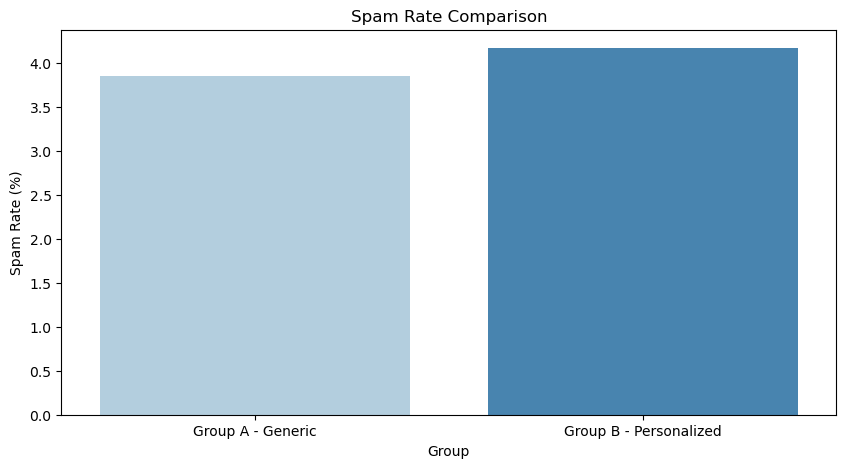

C:\Users\PanDa\AppData\Local\Temp\ipykernel_8348\1302883311.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Group", y="Bounce Rate", data=df_vis, palette="Reds")


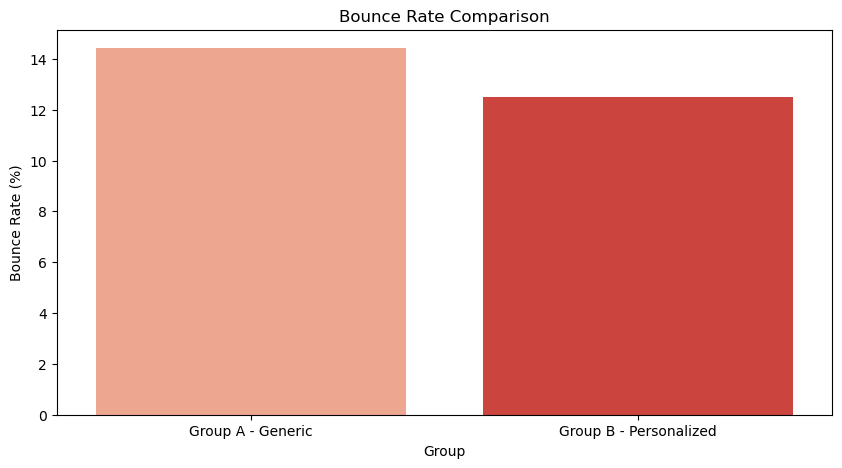

In [20]:


group_a = df[df["Test_Group"] == "Group A - Generic"]
group_b = df[df["Test_Group"] == "Group B - Personalized"]

# Debugging: Print the number of rows in each group
print(f"\nNumber of rows in Group A (Generic): {len(group_a)}")
print(f"Number of rows in Group B (Personalized): {len(group_b)}")

# Calculate spam rates
if "Email_Status" not in df.columns:
    print("\nError: 'Email_Status' column not found in the dataset.")
    exit()

spam_a = group_a[group_a["Email_Status"] == "Spam Reported"].shape[0]  # Spam in Group A
total_a = group_a.shape[0]  # Total emails in Group A
spam_rate_a = (spam_a / total_a) * 100  # Spam rate for Group A

spam_b = group_b[group_b["Email_Status"] == "Spam Reported"].shape[0]  # Spam in Group B
total_b = group_b.shape[0]  # Total emails in Group B
spam_rate_b = (spam_b / total_b) * 100  # Spam rate for Group B

# Calculate bounce rates
bounce_a = group_a[group_a["Email_Status"] == "Bounced"].shape[0]  # Bounced in Group A
bounce_rate_a = (bounce_a / total_a) * 100  # Bounce rate for Group A

bounce_b = group_b[group_b["Email_Status"] == "Bounced"].shape[0]  # Bounced in Group B
bounce_rate_b = (bounce_b / total_b) * 100  # Bounce rate for Group B

# Print the percentages
print("\nSpam Rates:")
print(f"Group A (Generic): {spam_rate_a:.2f}%")
print(f"Group B (Personalized): {spam_rate_b:.2f}%")

print("\nBounce Rates:")
print(f"Group A (Generic): {bounce_rate_a:.2f}%")
print(f"Group B (Personalized): {bounce_rate_b:.2f}%")

# Visualization
# Create a DataFrame for visualization
data = {
    "Group": ["Group A - Generic", "Group B - Personalized"],
    "Spam Rate": [spam_rate_a, spam_rate_b],
    "Bounce Rate": [bounce_rate_a, bounce_rate_b]
}
df_vis = pd.DataFrame(data)

# Plot spam rates
plt.figure(figsize=(10, 5))
sns.barplot(x="Group", y="Spam Rate", data=df_vis, palette="Blues")
plt.title("Spam Rate Comparison")
plt.ylabel("Spam Rate (%)")
plt.xlabel("Group")
plt.show()

# Plot bounce rates
plt.figure(figsize=(10, 5))
sns.barplot(x="Group", y="Bounce Rate", data=df_vis, palette="Reds")
plt.title("Bounce Rate Comparison")
plt.ylabel("Bounce Rate (%)")
plt.xlabel("Group")
plt.show()


Spam Rate (General):
4.00% of emails were marked as spam.

Bounce Rate (General):
13.50% of emails bounced.


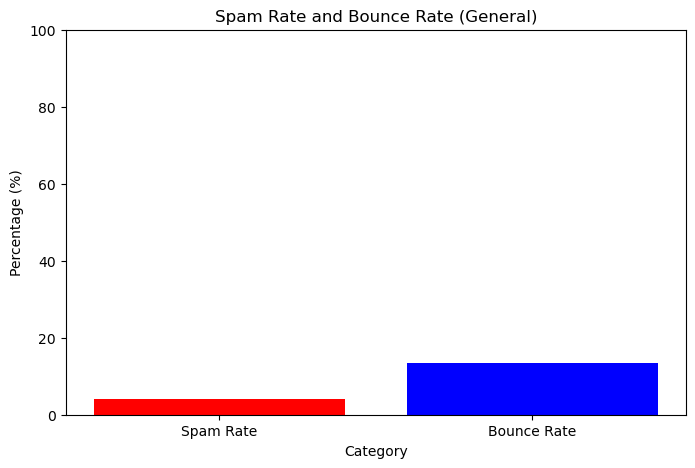

In [18]:
# Calculate spam rate
total_emails = df.shape[0]  # Total number of emails
spam_count = df[df["Email_Status"] == "Spam Reported"].shape[0]  # Number of spam emails
spam_rate = (spam_count / total_emails) * 100  # Spam rate in percentage

# Calculate bounce rate
bounce_count = df[df["Email_Status"] == "Bounced"].shape[0]  # Number of bounced emails
bounce_rate = (bounce_count / total_emails) * 100  # Bounce rate in percentage

# Print the percentages
print("\nSpam Rate (General):")
print(f"{spam_rate:.2f}% of emails were marked as spam.")

print("\nBounce Rate (General):")
print(f"{bounce_rate:.2f}% of emails bounced.")

# Visualization
# Create a DataFrame for visualization
data = {
    "Category": ["Spam Rate", "Bounce Rate"],
    "Percentage": [spam_rate, bounce_rate]
}
df_vis = pd.DataFrame(data)

# Plot the rates
plt.figure(figsize=(8, 5))
plt.bar(df_vis["Category"], df_vis["Percentage"], color=["red", "blue"])
plt.title("Spam Rate and Bounce Rate (General)")
plt.ylabel("Percentage (%)")
plt.xlabel("Category")
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.show()